In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
import pylab
from scipy.stats import sem, ttest_ind,linregress

In [2]:
# import US housing v unemployment file
US_housing_v_unemployment = "Housing v Unemployment for US.xlsx"
US_housing_v_unemployment = pd.read_excel(US_housing_v_unemployment)
US_housing_v_unemployment.head()

,Date (Quarterly),Avg Home Price,Unemployment Rate (%),Avg Home Price Chg,Unemployment Rate Chg,Avg Home Price Chg (Norm),Unemployment Rate Chg (Norm)
2,7/1/1970,23000,5.316556,-0.057377,0.105604,-0.071344,0.104764
3,10/1/1970,22600,5.825915,-0.017391,0.095806,-0.031358,0.094967
4,1/1/1971,24300,5.995553,0.075221,0.029118,0.061255,0.028278
5,4/1/1971,25800,6.019385,0.061728,0.003975,0.047762,0.003135
6,7/1/1971,25300,6.131638,-0.019380,0.018649,-0.033347,0.017809


In [3]:
# import US housing v unemployment file 10 yrs
US_housing_v_unemployment_10yr = "Housing v Unemployment for US (10yrs).xlsx"
US_housing_v_unemployment_10yr = pd.read_excel(US_housing_v_unemployment_10yr)
US_housing_v_unemployment_10yr.head()

,Date (Quarterly),Avg Home Price,Unemployment Rate (%),Avg Home Price Chg,Unemployment Rate Chg,Avg Home Price Chg (Norm),Unemployment Rate Chg (Norm)
157,4/1/2009,220900,9.385747,0.059981,0.118673,0.046014,0.117834
158,7/1/2009,214300,9.733635,-0.029878,0.037066,-0.043844,0.036226
159,10/1/2009,219000,10.086535,0.021932,0.036256,0.007965,0.035416
160,1/1/2010,222900,9.947779,0.017808,-0.013757,0.003842,-0.014596
161,4/1/2010,219500,9.832738,-0.015253,-0.011564,-0.029220,-0.012404


In [4]:
# import regional housing v unemployment file 10 yrs
housing_v_unemployment_region = "Housing v Unemployment for Region (10 yrs).xlsx"
housing_v_unemployment_region = pd.read_excel(housing_v_unemployment_region)
housing_v_unemployment_region.head()

,Date (Quarterly),NorthEast AHP,MidWest AHP,West AHP,South AHP,NorthEast AHP Chg,MidWest AHP Chg,West AHP Chg,South AHP Chg,NorthEast AHP Chg (Norm),...,South UE%,West UE%,NorthEast UE Chg,MidWest UE Chg,West UE Chg,South UE Chg,NorthEast UE Chg (Norm),MidWest UE Chg (Norm),West UE Chg (Norm),South UE Chg (Norm)
155,10/1/2014,605000,312400,420600,332500,-0.003131,0.009044,0.069685,0.119152,-0.022687,...,5.8,6.4,0.000000,-0.018182,-0.015385,0.000000,0.001574,-0.017109,-0.014021,0.001022
156,1/1/2015,621400,320200,408700,309000,0.027107,0.024968,-0.028293,-0.070677,0.007552,...,5.5,6.1,-0.017544,-0.019231,-0.016129,-0.017857,-0.015970,-0.018158,-0.014765,-0.016835
157,4/1/2015,485000,325300,391100,306300,-0.219504,0.015928,-0.043063,-0.008738,-0.239060,...,5.4,5.9,0.000000,0.000000,-0.016667,-0.018182,0.001574,0.001072,-0.015303,-0.017160
158,7/1/2015,526700,302000,409600,312200,0.085979,-0.071626,0.047302,0.019262,0.066423,...,5.2,5.7,-0.018868,0.000000,0.000000,-0.018868,-0.017294,0.001072,0.001364,-0.017846
159,10/1/2015,641300,313600,427200,324200,0.217581,0.038411,0.042969,0.038437,0.198025,...,5.1,5.4,-0.020000,-0.021277,-0.018182,0.000000,-0.018426,-0.020204,-0.016818,0.001022


<function matplotlib.pyplot.show(*args, **kw)>

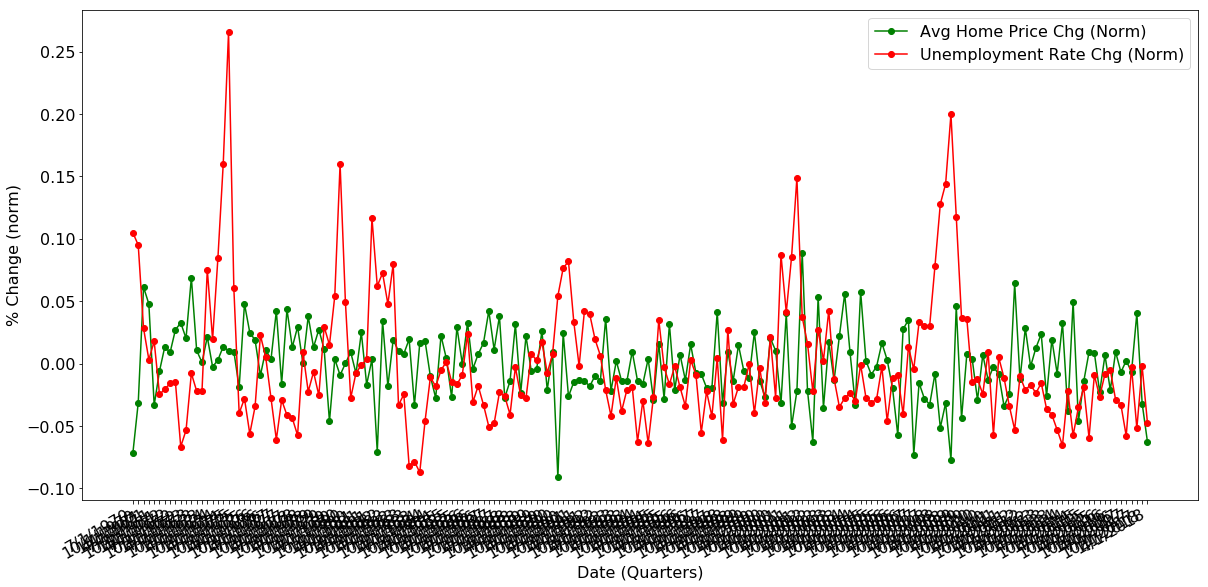

In [5]:
#plot US data
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

x = US_housing_v_unemployment["Date (Quarterly)"]
y1 = US_housing_v_unemployment["Avg Home Price Chg (Norm)"]
y2 = US_housing_v_unemployment["Unemployment Rate Chg (Norm)"]

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")
fig.set_label("Home Price v. Unemployment - last 10 yrs")

AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment US.png')
plt.show

In [6]:
stats.chisquare(US_housing_v_unemployment["Avg Home Price Chg (Norm)"], US_housing_v_unemployment["Unemployment Rate Chg (Norm)"])

Power_divergenceResult(statistic=-7.288399236389502, pvalue=1.0)

In [7]:
US_housing_v_unemployment["Avg Home Price Chg (Norm)"].corr(US_housing_v_unemployment["Unemployment Rate Chg (Norm)"])

-0.18935060458086425

<function matplotlib.pyplot.show(*args, **kw)>

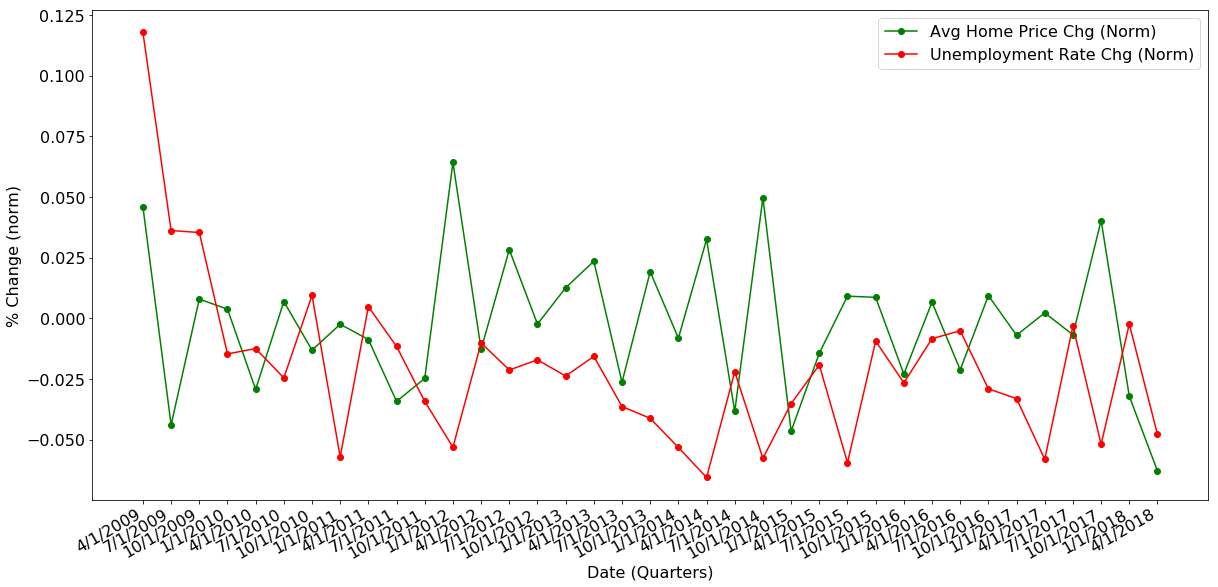

In [8]:
#plot US data 10yr
x_10yr = US_housing_v_unemployment_10yr["Date (Quarterly)"]
y1_10yr = US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"]
y2_10yr = US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Date (Quarters)")
ax2.set_ylabel("% Change (norm)")


AHP_Chg_10yr = plt.plot(x_10yr, y1_10yr, color='g', marker = 'o')
UER_Chg_10yr = plt.plot(x_10yr, y2_10yr, color='r', marker = 'o')

plt.legend(loc= "best")

ax2.grid(False)
fig2.autofmt_xdate()
plt.savefig('housing v unemployment US 10yr.png')
plt.show

In [9]:
stats.ttest_ind(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=2.486582669145937, pvalue=0.015217425274643242)

In [10]:
stats.f_oneway(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

F_onewayResult(statistic=6.183093370496933, pvalue=0.015217425274643233)

In [11]:
stats.chisquare(US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"], US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

Power_divergenceResult(statistic=-1.7708613543174088, pvalue=1.0)

In [12]:
US_housing_v_unemployment_10yr["Avg Home Price Chg (Norm)"].corr(US_housing_v_unemployment_10yr["Unemployment Rate Chg (Norm)"])

-0.045917839469143865

<function matplotlib.pyplot.show(*args, **kw)>

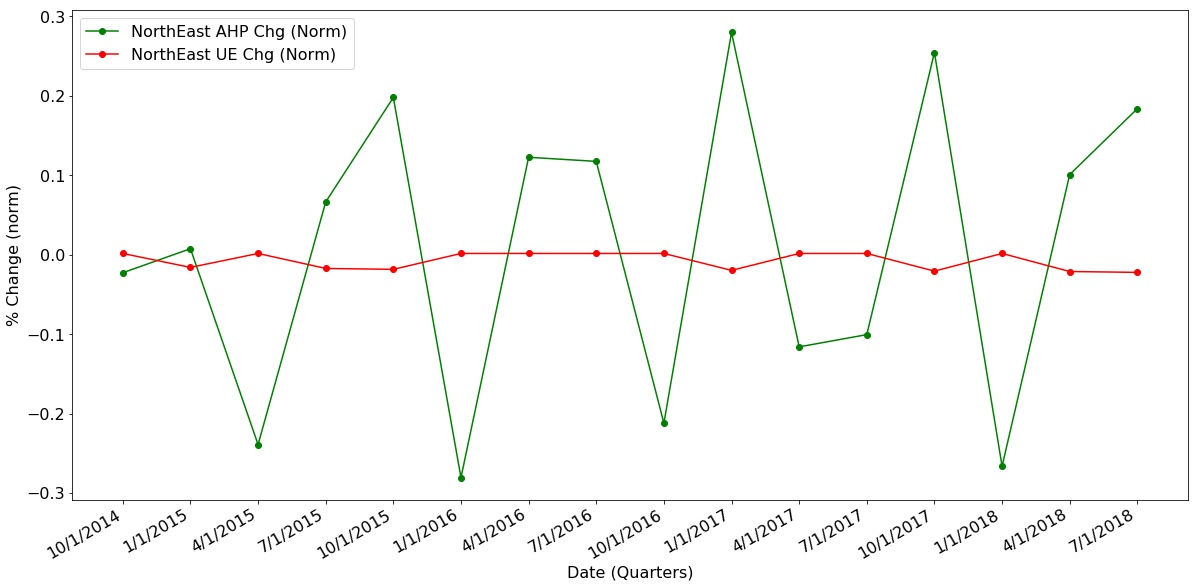

In [13]:
#NORTHEAST

import pylab

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["NorthEast AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["NorthEast UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment northeast.png')
plt.show

In [14]:
stats.ttest_ind(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.28452810455690297, pvalue=0.7779605498157851)

In [15]:
stats.f_oneway(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

F_onewayResult(statistic=0.08095624228274402, pvalue=0.7779605498157837)

In [16]:
stats.chisquare(housing_v_unemployment_region["NorthEast AHP Chg (Norm)"], housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

Power_divergenceResult(statistic=181.7801169697999, pvalue=1.0399475420285565e-30)

In [17]:
housing_v_unemployment_region["NorthEast AHP Chg (Norm)"].corr(housing_v_unemployment_region["NorthEast UE Chg (Norm)"])

-0.7434253185204501

<function matplotlib.pyplot.show(*args, **kw)>

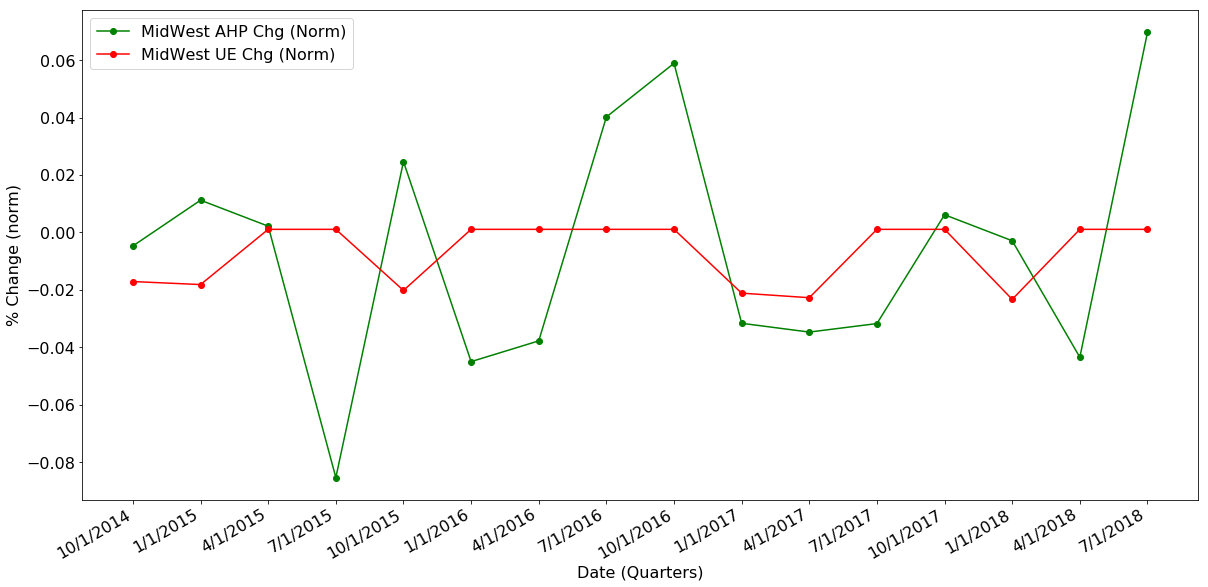

In [18]:
#MIDWEST

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["MidWest AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["MidWest UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment midwest.png')
plt.show 

In [19]:
stats.ttest_ind(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.04433122803923622, pvalue=0.9649341473775759)

In [20]:
stats.f_oneway(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"])

F_onewayResult(statistic=0.0019652577794667457, pvalue=0.9649341473775784)

In [21]:
stats.chisquare(housing_v_unemployment_region["MidWest AHP Chg (Norm)"], housing_v_unemployment_region["MidWest UE Chg (Norm)"])

Power_divergenceResult(statistic=21.97861957189398, pvalue=0.1083657531025277)

In [22]:
housing_v_unemployment_region["MidWest AHP Chg (Norm)"].corr(housing_v_unemployment_region["MidWest UE Chg (Norm)"])

0.015275807214688382

<function matplotlib.pyplot.show(*args, **kw)>

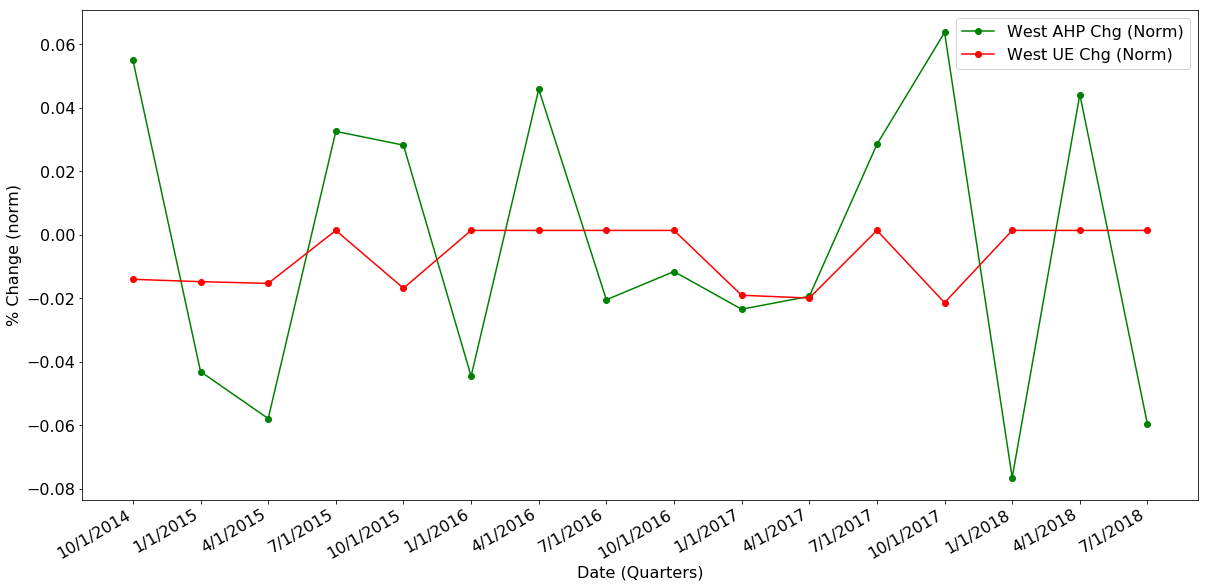

In [23]:
#WEST

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["West AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["West UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment west.png')
plt.show 

In [24]:
stats.ttest_ind(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.26797827347598474, pvalue=0.7905500380294426)

In [25]:
stats.f_oneway(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"])

F_onewayResult(statistic=0.07181235505516959, pvalue=0.7905500380294426)

In [26]:
stats.chisquare(housing_v_unemployment_region["West AHP Chg (Norm)"], housing_v_unemployment_region["West UE Chg (Norm)"])

Power_divergenceResult(statistic=12.240166320648793, pvalue=0.6607668486251853)

In [27]:
housing_v_unemployment_region["West AHP Chg (Norm)"].corr(housing_v_unemployment_region["West UE Chg (Norm)"])

-0.10953354477153378

<function matplotlib.pyplot.show(*args, **kw)>

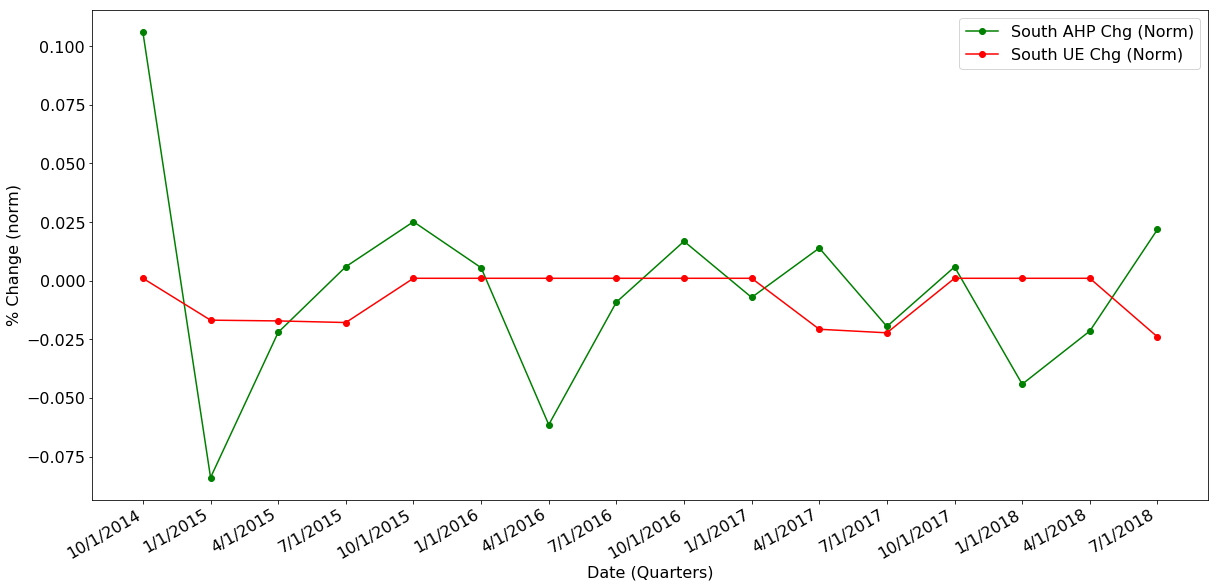

In [28]:
#SOUTH

x = housing_v_unemployment_region["Date (Quarterly)"]
y1 = housing_v_unemployment_region["South AHP Chg (Norm)"]
y2 = housing_v_unemployment_region["South UE Chg (Norm)"]

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig, ax = plt.subplots()

ax.set_xlabel("Date (Quarters)")
ax.set_ylabel("% Change (norm)")


AHP_Chg = plt.plot(x, y1, color='g', marker = 'o')
UER_Chg = plt.plot(x, y2, color='r', marker = 'o')

plt.legend(loc= "best")

ax.grid(False)
fig.autofmt_xdate()
plt.savefig('housing v unemployment south.png')
plt.show

In [29]:
stats.ttest_ind(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"], axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=0.23331420551782625, pvalue=0.8171021036384443)

In [30]:
stats.f_oneway(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"])

F_onewayResult(statistic=0.054435518496414446, pvalue=0.8171021036384403)

In [31]:
stats.chisquare(housing_v_unemployment_region["South AHP Chg (Norm)"], housing_v_unemployment_region["South UE Chg (Norm)"])

Power_divergenceResult(statistic=17.63297612374302, pvalue=0.2824522703423158)

In [32]:
housing_v_unemployment_region["South AHP Chg (Norm)"].corr(housing_v_unemployment_region["South UE Chg (Norm)"])

0.12888566104547863

In [33]:
# import US household income file
housing_file = "housingincome_region.csv"
housing_v_income_region = pd.read_csv(housing_file)
housing_v_income_region.head()

,Date,West Income,NorthEast Income,South Income,MidWest Income,NorthEast HP,MidWest HP,West HP,South HP,Avg West HP Chg,...,Avg NorthEast HP Chg (Norm),NorthEast Income Chg (Norm),Avg MidWest HP Chg,MidWest Income Chg,Avg MidWest HP Chg (Norm),MidWest Income Chg (Norm),Avg South HP Chg,South Income Chg,Avg South HP Chg (Norm),South Income Chg (Norm)
0,1976,68904,67903,60730,69804,50125,48725,51925,43775,0.174110,...,-0.003299,-0.014752,0.125289,0.041866,0.074816,0.031999,0.106128,0.032929,0.053151,0.021739
1,1977,69769,70404,62512,69577,54600,55325,61275,48025,0.180067,...,0.024007,0.024240,0.135454,-0.003252,0.084982,-0.013119,0.097087,0.029343,0.044110,0.018153
2,1978,73517,71273,64365,71526,62800,64350,70650,55650,0.152999,...,0.084913,-0.000248,0.163127,0.028012,0.112655,0.018145,0.158771,0.029642,0.105794,0.018453
3,1979,75181,73252,64740,72311,72050,72950,82875,63525,0.173036,...,0.082023,0.015175,0.133644,0.010975,0.083172,0.001108,0.141509,0.005826,0.088532,-0.005363
4,1980,73106,70516,63034,69152,79475,74475,89875,69100,0.084465,...,0.037784,-0.049942,0.020905,-0.043686,-0.029568,-0.053554,0.087761,-0.026352,0.034784,-0.037541


TypeError: 'builtin_function_or_method' object is not subscriptable

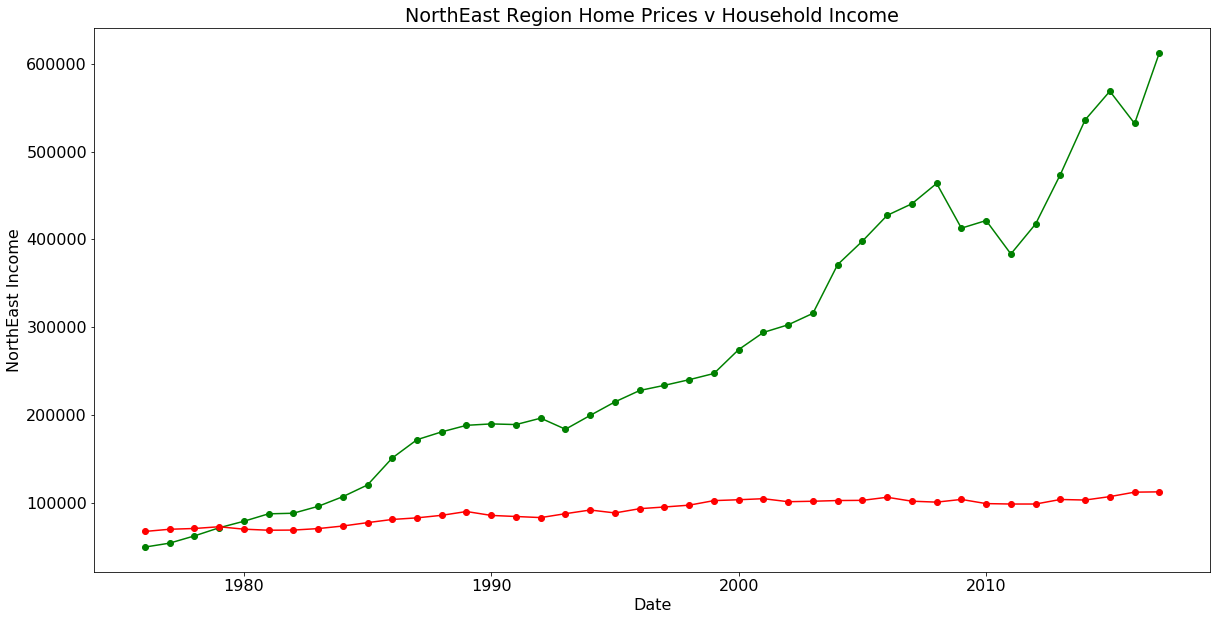

In [34]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices v Household Income")


NEHP = housing_v_income_region["NorthEast HP"]
NEI = housing_v_income_region["NorthEast Income"]


x_axis1 = housing_v_income_region["Date"]

NEHP_trend = plt.plot(x_axis1,NEHP,color='g',marker = "o")
NEI_trend = plt.plot(x_axis1,NEI,color='r',marker = "o")

plt.savefig("NE Vs Income.jpg")

ax.set_xlim(len["Date"])

fig1.autofmt_xdate()
plt.legend(loc="best")

In [35]:
housing_v_income_region["NorthEast HP"].corr(housing_v_income_region["NorthEast Income"])

0.9049753354900574

In [36]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], 
                 housing_v_income_region["NorthEast Income"],
                 equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=7.249948903451887, pvalue=2.0925939764313356e-10)

In [37]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"], axis=0, equal_var=False)

Ttest_indResult(statistic=7.249948903451887, pvalue=6.733908901331057e-09)

In [38]:
stats.f_oneway(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

F_onewayResult(statistic=52.561759102663274, pvalue=2.092593976431308e-10)

In [39]:
stats.chisquare(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

Power_divergenceResult(statistic=21089347.792333677, pvalue=0.0)

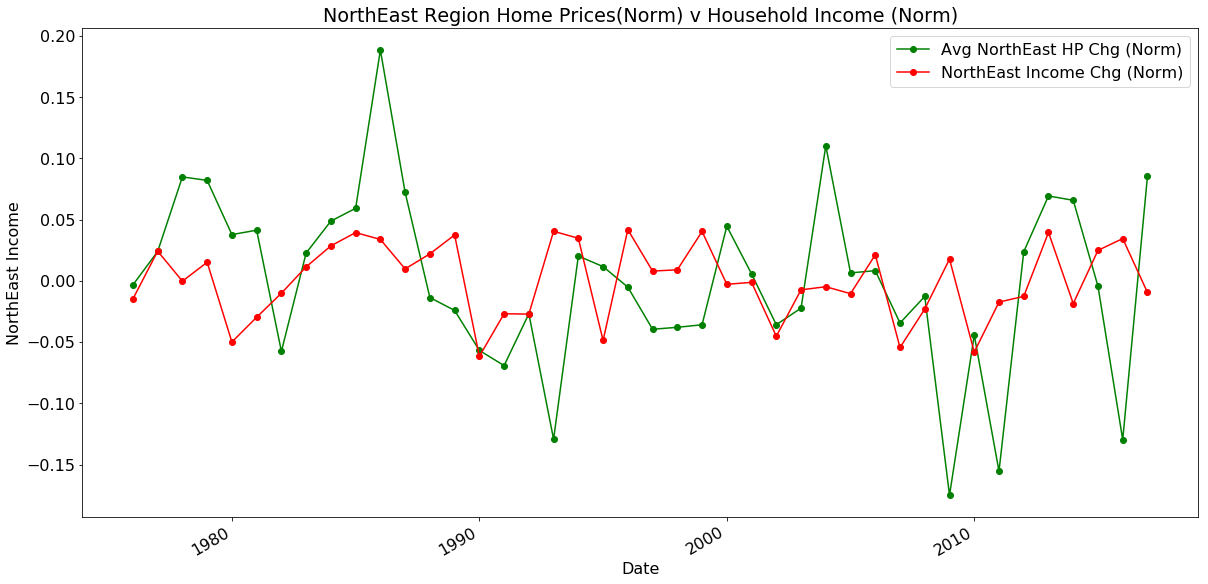

In [40]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]
Inc_W = housing_v_income_region["NorthEast Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")

plt.savefig("NE Vs Income(Norm).jpg")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [41]:
housing_v_income_region["NorthEast Income Chg (Norm)"].corr(housing_v_income_region["Avg NorthEast HP Chg (Norm)"])

0.10368327318093802

In [42]:
linregress(housing_v_income_region["NorthEast Income Chg (Norm)"], housing_v_income_region["Avg NorthEast HP Chg (Norm)"])

LinregressResult(slope=0.24123321663554567, intercept=8.291586696520504e-11, rvalue=0.10368327318093801, pvalue=0.5134786242210739, stderr=0.3658907194603212)

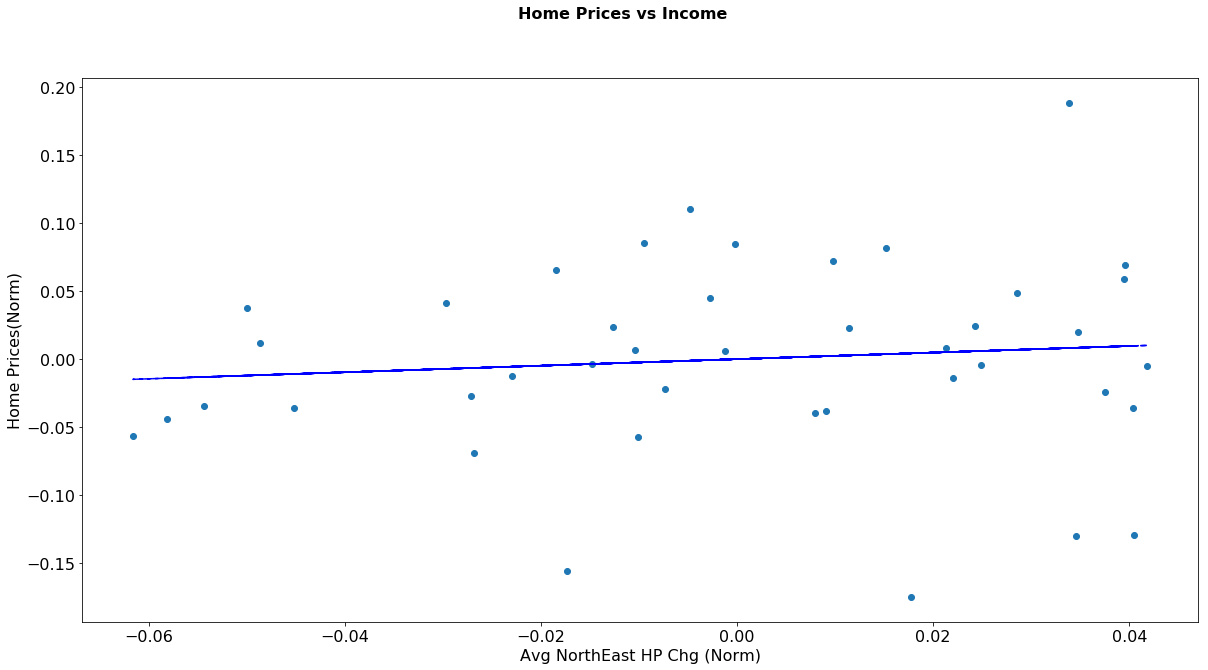

In [43]:
x_axis = housing_v_income_region["NorthEast Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg NorthEast HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

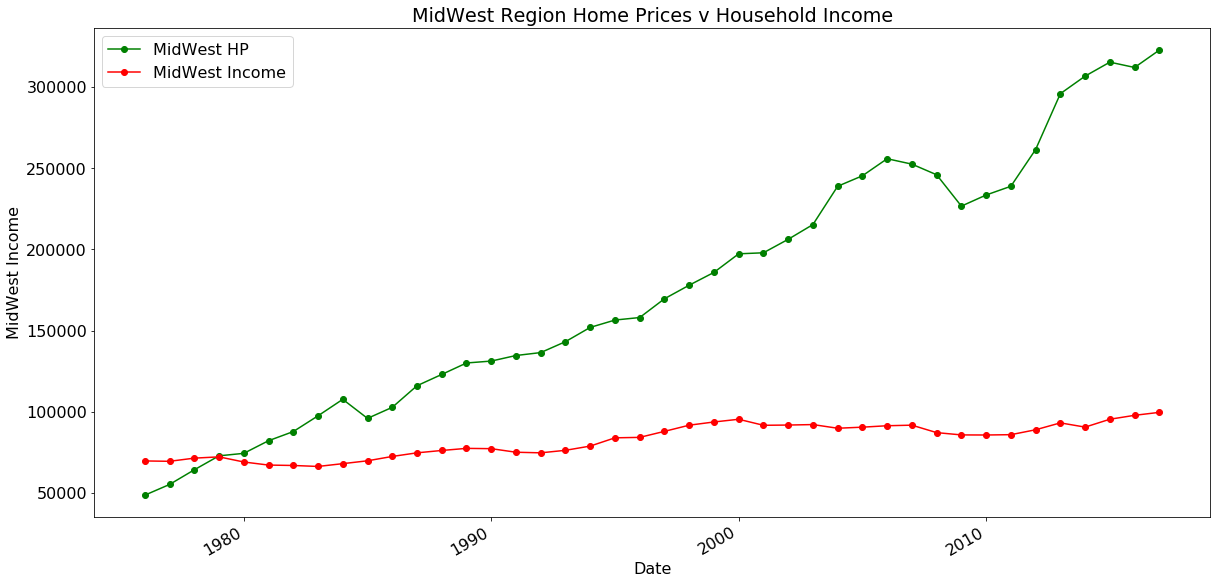

In [44]:
 #MIDWEST

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices v Household Income")

MWHP = housing_v_income_region["MidWest HP"]
MWI = housing_v_income_region["MidWest Income"]


x_axis1 = housing_v_income_region["Date"]

MWHP_trend = plt.plot(x_axis1,MWHP,color='g',marker = "o")
MWI_trend = plt.plot(x_axis1,MWI,color='r',marker = "o")


plt.savefig("MW Vs Income.png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [45]:
housing_v_income_region["MidWest Income"].corr(housing_v_income_region["MidWest HP"])

0.9016640812020873

In [46]:
stats.f_oneway(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

F_onewayResult(statistic=57.2075675787015, pvalue=5.080184377408186e-11)

In [47]:
stats.chisquare(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

Power_divergenceResult(statistic=6238510.300290037, pvalue=0.0)

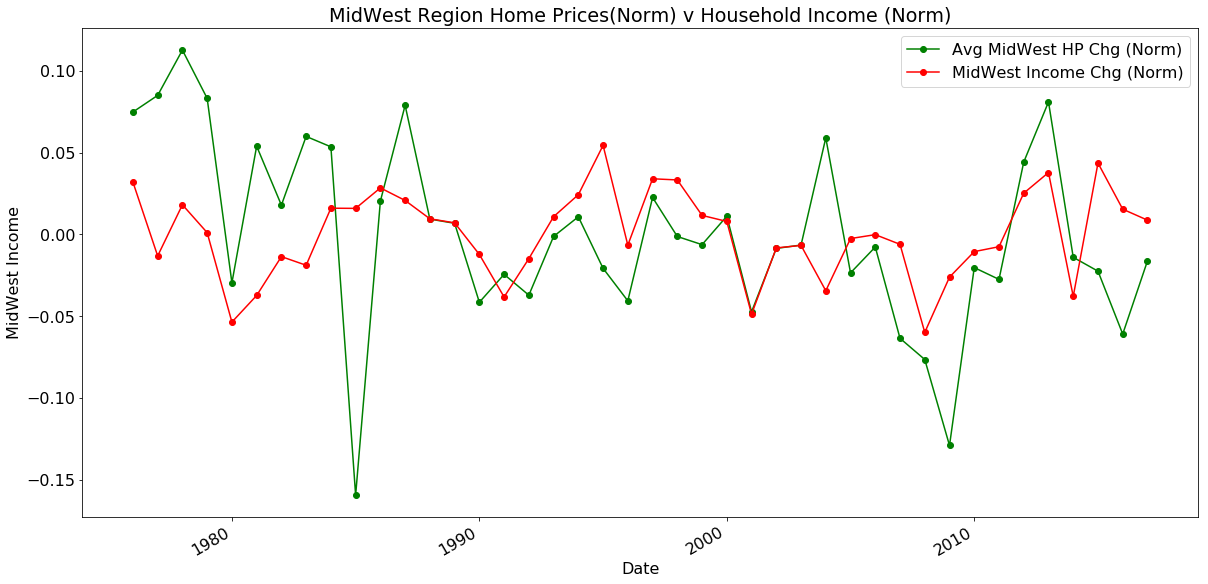

In [48]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg MidWest HP Chg (Norm)"]
Inc_W = housing_v_income_region["MidWest Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("MW Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [49]:
housing_v_income_region["MidWest Income Chg (Norm)"].corr(housing_v_income_region["Avg MidWest HP Chg (Norm)"])

0.2607926346973953

In [50]:
linregress(housing_v_income_region["MidWest Income Chg (Norm)"], housing_v_income_region["Avg MidWest HP Chg (Norm)"])

LinregressResult(slope=0.5400245957651517, intercept=-1.905934166550456e-12, rvalue=0.2607926346973952, pvalue=0.09528983285830739, stderr=0.316077220199488)

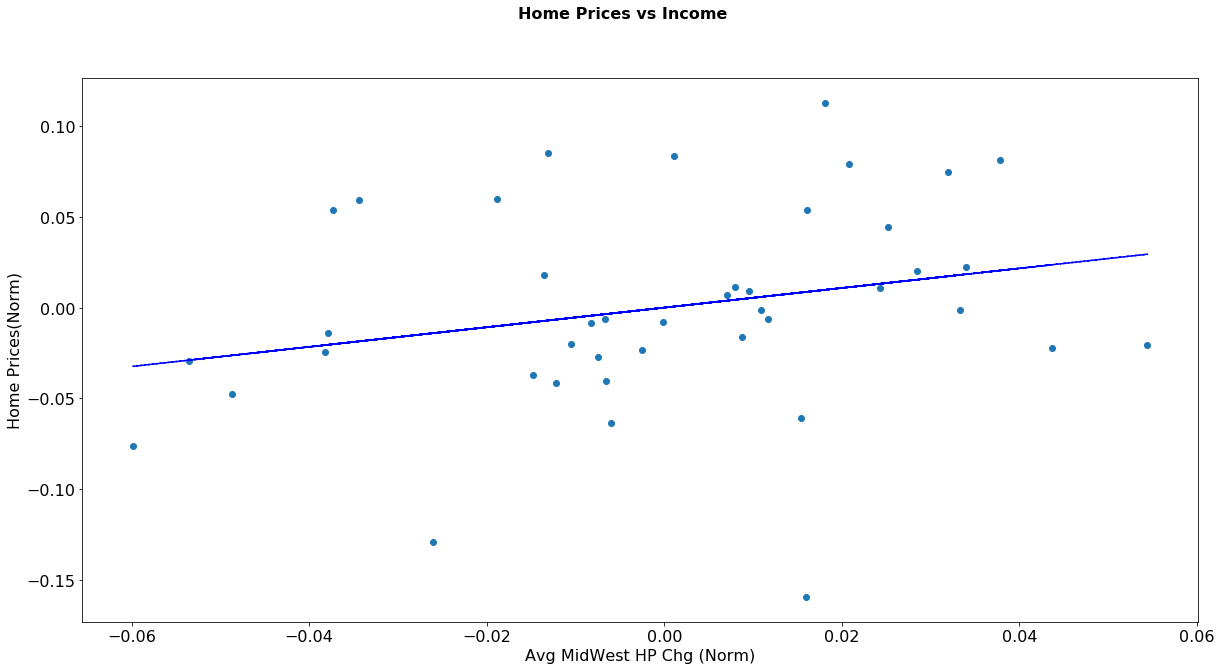

In [51]:
# Set data
x_axis = housing_v_income_region["MidWest Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg MidWest HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg MidWest HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

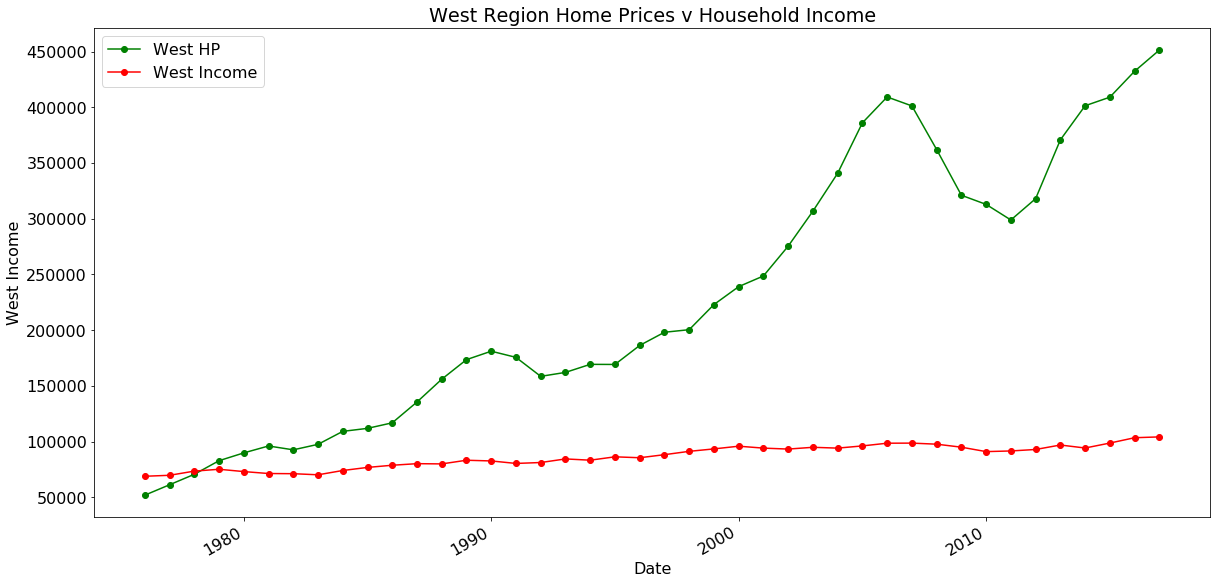

In [52]:
#WEST

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")

WHP = housing_v_income_region["West HP"]
WI = housing_v_income_region["West Income"]


x_axis1 = housing_v_income_region["Date"]

WHP_trend = plt.plot(x_axis1,WHP,color='g',marker = "o")
WI_trend = plt.plot(x_axis1,WI,color='r',marker = "o")

fig1.autofmt_xdate()
plt.title("West Region Home Prices v Household Income")
plt.savefig("West Vs Income.png")

plt.legend(loc="best")

In [53]:
housing_v_income_region["West Income"].corr(housing_v_income_region["West HP"])

0.9430650391911549

In [54]:
stats.f_oneway(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

F_onewayResult(statistic=57.668281607844655, pvalue=4.4266711954388435e-11)

In [55]:
stats.chisquare(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

Power_divergenceResult(statistic=13891849.3810831, pvalue=0.0)

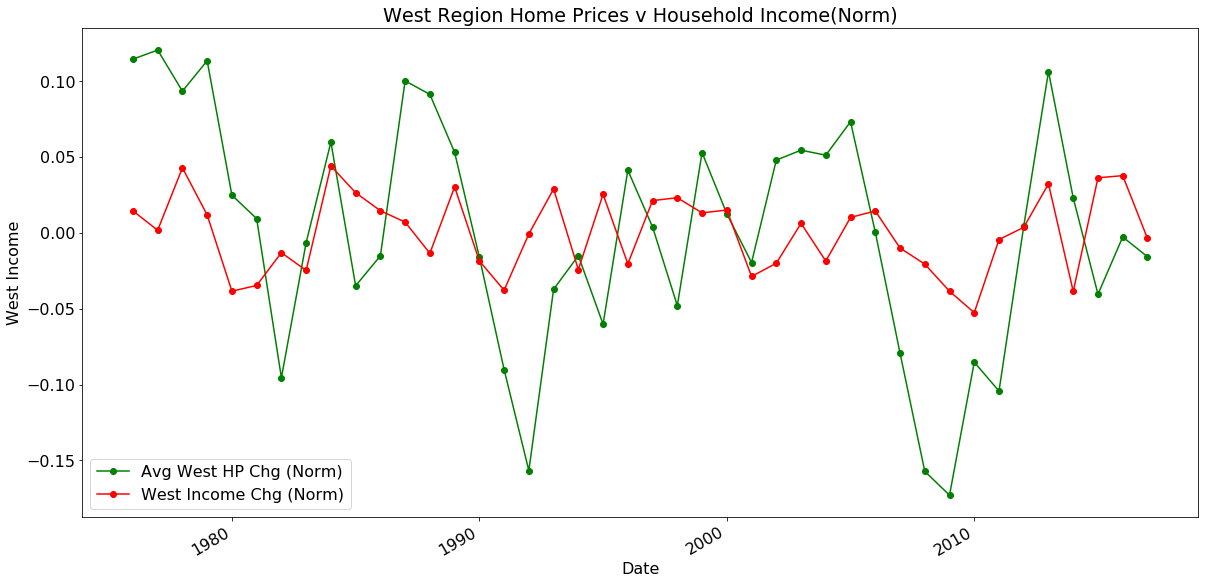

In [56]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")
plt.title("West Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg West HP Chg (Norm)"]
Inc_W = housing_v_income_region["West Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.title("West Region Home Prices v Household Income(Norm)")
plt.savefig("West Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [57]:
housing_v_income_region["West Income Chg (Norm)"].corr(housing_v_income_region["Avg West HP Chg (Norm)"])

0.33453760202008065

In [58]:
linregress(housing_v_income_region["West Income Chg (Norm)"], housing_v_income_region["Avg West HP Chg (Norm)"])

LinregressResult(slope=0.9850140951176575, intercept=2.3452713823490827e-11, rvalue=0.3345376020200807, pvalue=0.03035367560889692, stderr=0.43872731850534)

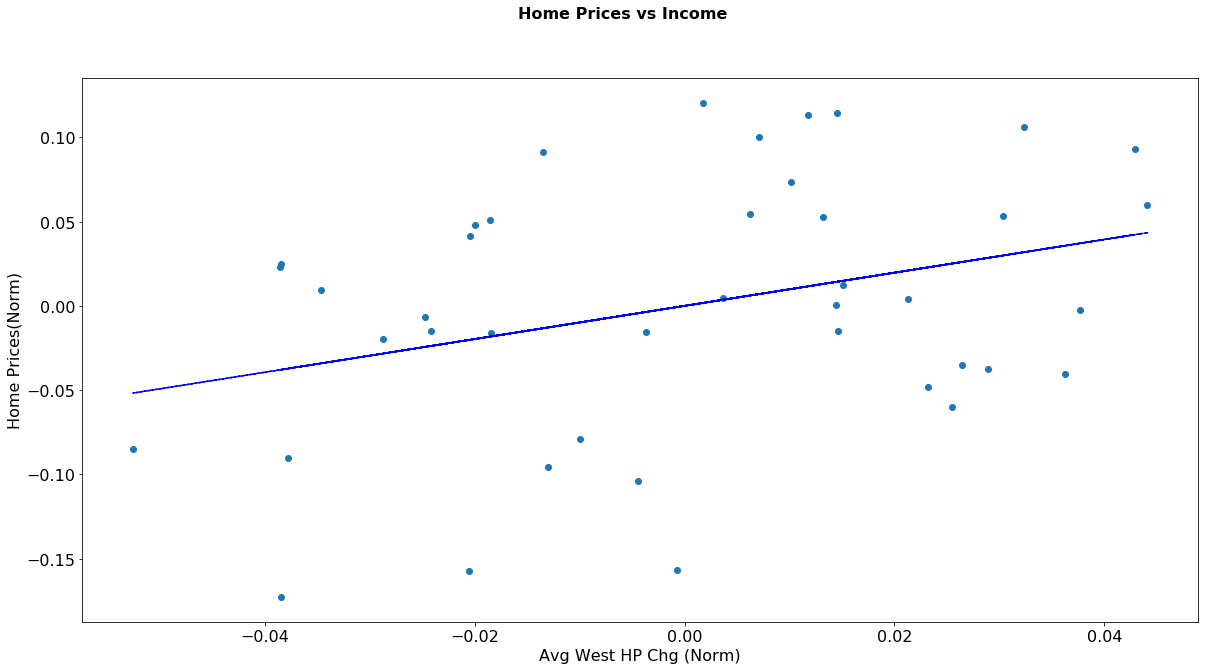

In [59]:
# Set data
x_axis = housing_v_income_region["West Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg West HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg West HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

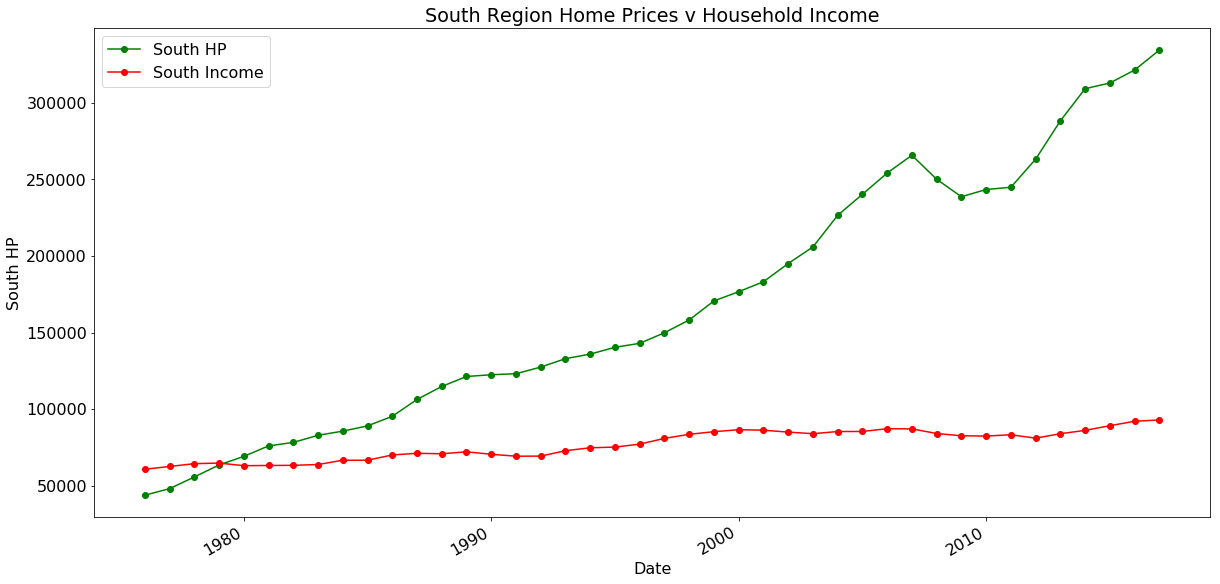

In [60]:
fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South HP")

SHP = housing_v_income_region["South HP"]
SI = housing_v_income_region["South Income"]


x_axis1 = housing_v_income_region["Date"]

SHP_trend = plt.plot(x_axis1,SHP,color='g',marker = "o")
SI_trend = plt.plot(x_axis1,SI,color='r',marker = "o")
plt.title("South Region Home Prices v Household Income")
plt.savefig("South Vs Income(Norm).png")
fig1.autofmt_xdate()

plt.legend(loc="best")

In [61]:
housing_v_income_region["South Income"].corr(housing_v_income_region["South HP"])

0.9195335517729698

In [62]:
stats.f_oneway(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

F_onewayResult(statistic=49.38628824933491, pvalue=5.672717170767781e-10)

In [63]:
stats.chisquare(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

Power_divergenceResult(statistic=6895696.632259957, pvalue=0.0)

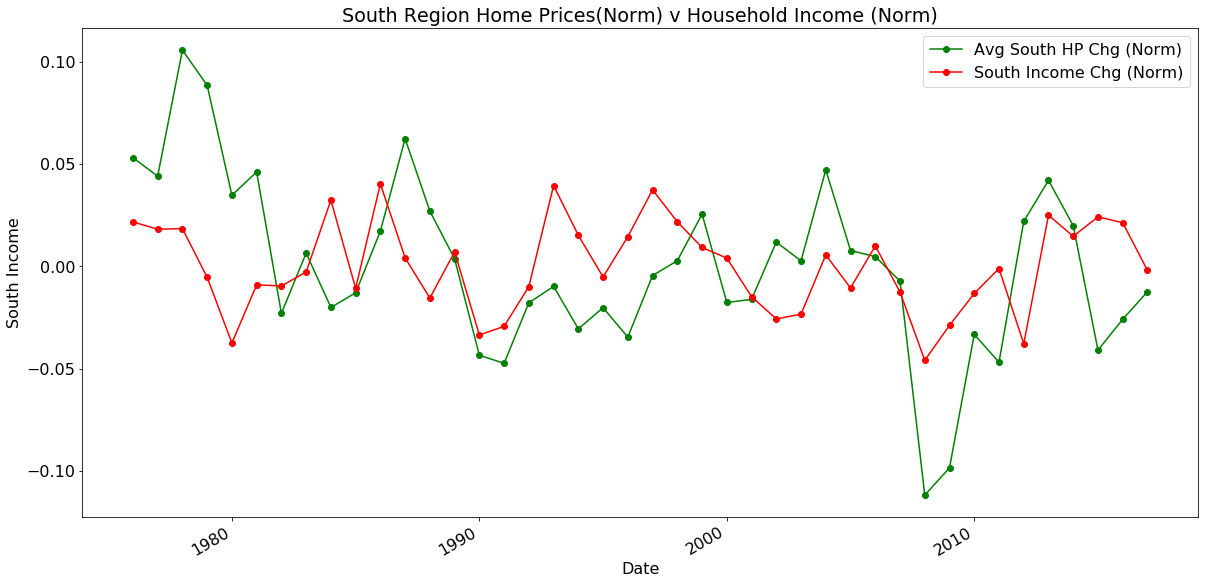

In [64]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South Income")
plt.title("South Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg South HP Chg (Norm)"]
Inc_W = housing_v_income_region["South Income Chg (Norm)"]

x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("South Vs Income(Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [65]:
housing_v_income_region["South Income Chg (Norm)"].corr(housing_v_income_region["Avg South HP Chg (Norm)"])

0.29477451905592733

In [66]:
linregress(housing_v_income_region["South Income Chg (Norm)"], housing_v_income_region["Avg South HP Chg (Norm)"])

LinregressResult(slope=0.5668184051145312, intercept=-1.1191560139718468e-10, rvalue=0.2947745190559273, pvalue=0.058085361044571175, stderr=0.29052604932233544)

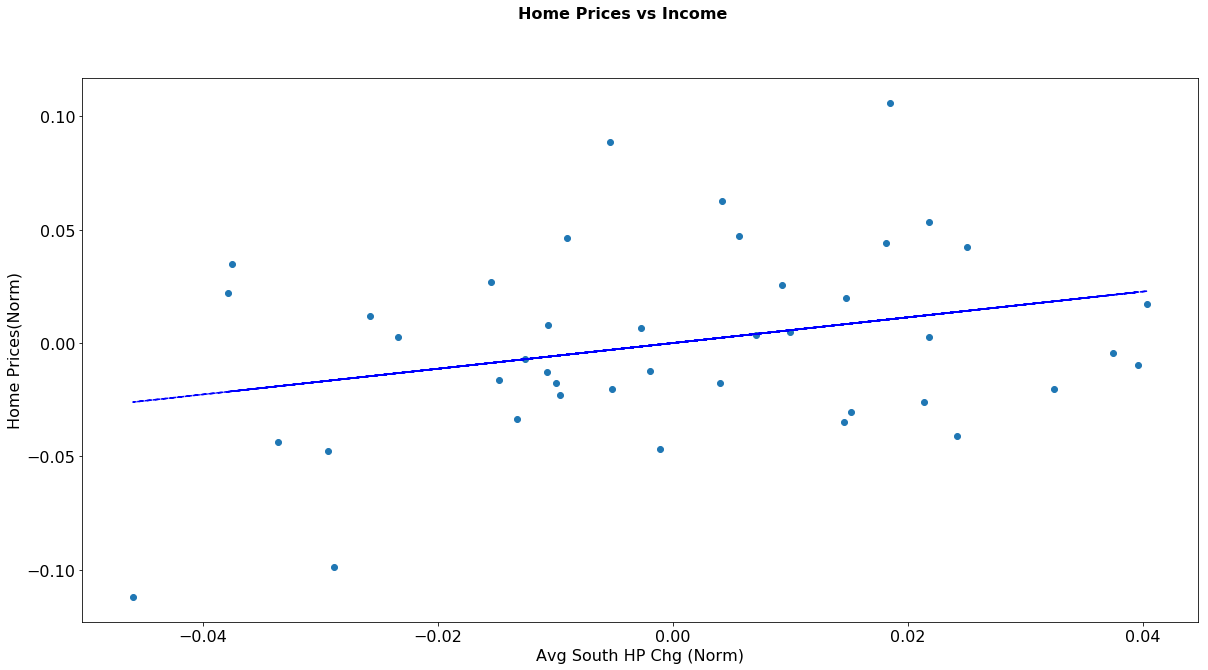

In [67]:
# Set data
x_axis = housing_v_income_region["South Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg South HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

ax.set_xlabel("Avg South HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

In [68]:
#All of US data 
housing_file_US = "housingincome_US.csv"
housing_v_income_US = pd.read_csv(housing_file_US)
housing_v_income_US.head()

,Date,AI,Avg HP,Avg US HP Chg,Annual Income Chg,Avg HP Chg (Norm),Income Chg (Norm)
0,1976,16870,44225,0.126034,0.085167,0.070020,0.034238
1,1977,18264,48900,0.105709,0.082632,0.049695,0.031703
2,1978,20091,55850,0.142127,0.100033,0.086113,0.049104
3,1979,22316,62750,0.123545,0.110746,0.067531,0.059818
4,1980,23974,64750,0.031873,0.074296,-0.024141,0.023368


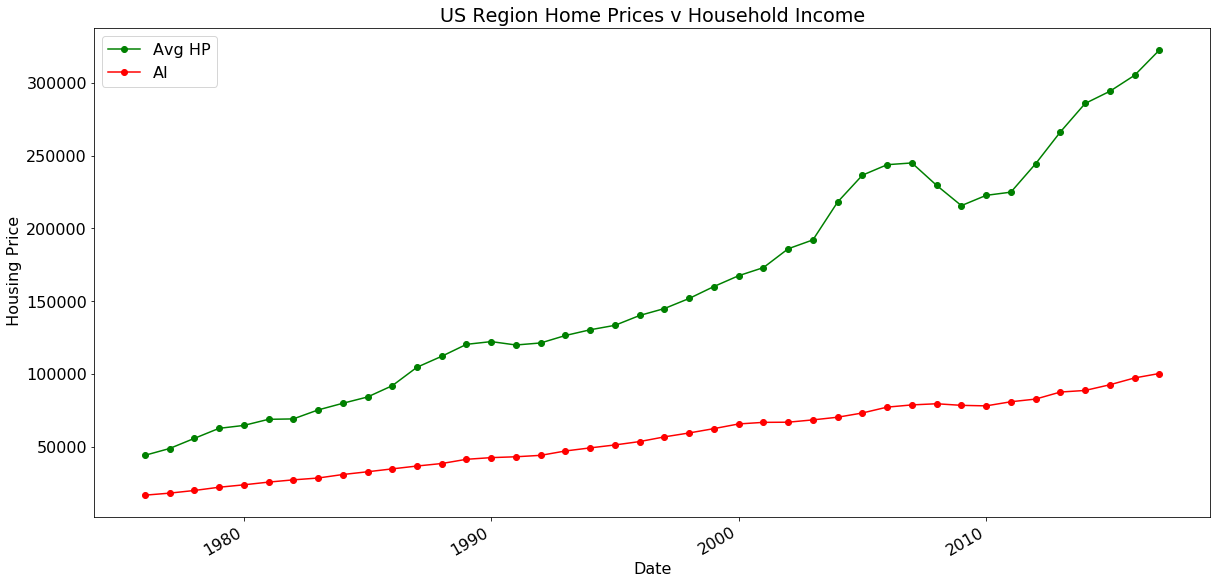

In [69]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices v Household Income")

USHP = housing_v_income_US["Avg HP"]
USI = housing_v_income_US["AI"]

x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income.png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [70]:
housing_v_income_US["AI"].corr(housing_v_income_US["Avg HP"])

0.9874363971778967

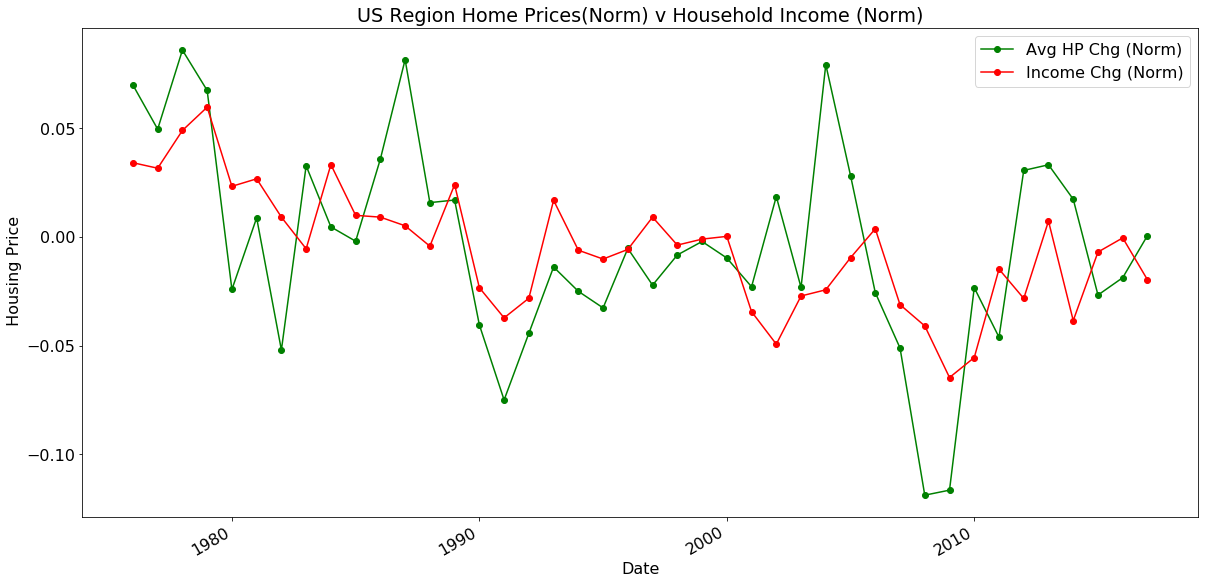

In [71]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices(Norm) v Household Income (Norm)")

USHP = housing_v_income_US["Avg HP Chg (Norm)"]
USI = housing_v_income_US["Income Chg (Norm)"]

x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income (Norm).png")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [72]:
housing_v_income_US["Income Chg (Norm)"].corr(housing_v_income_US["Avg HP Chg (Norm)"])

0.562822727768101

In [73]:
linregress(housing_v_income_US["Income Chg (Norm)"], housing_v_income_US["Avg HP Chg (Norm)"])

LinregressResult(slope=0.9459648246106103, intercept=0.001282833811002056, rvalue=0.5628227277681012, pvalue=0.00010449563145163793, stderr=0.21966305152379784)

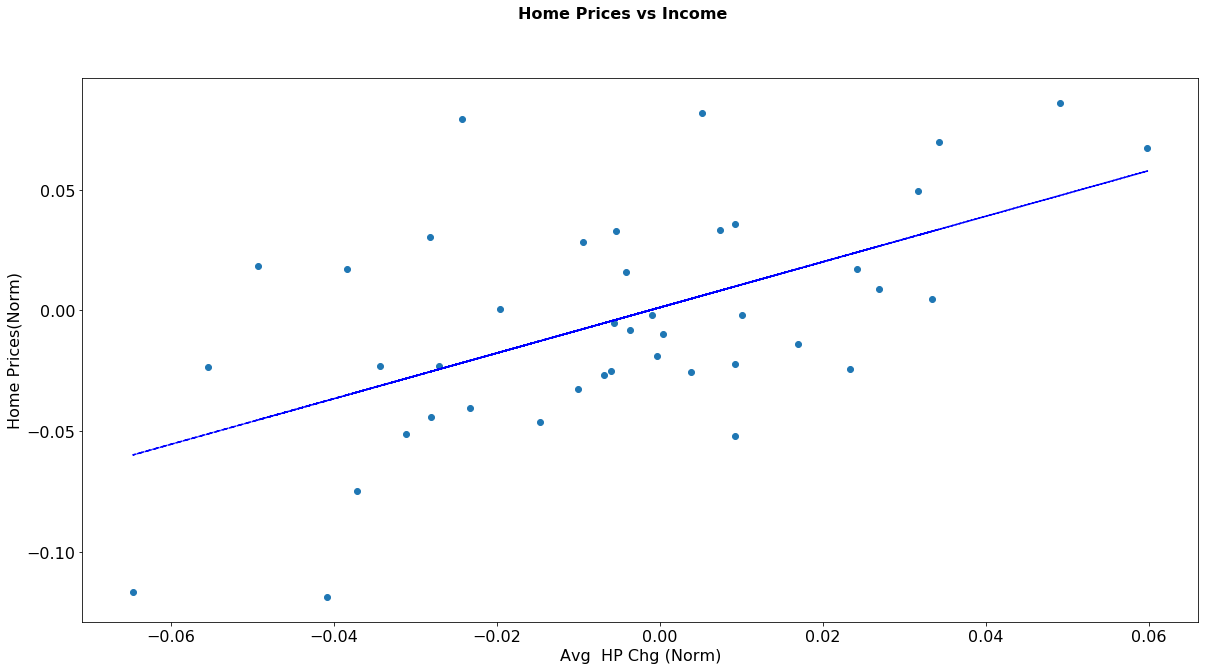

In [74]:
# Set data
x_axis = housing_v_income_US["Income Chg (Norm)"]
y_axis = housing_v_income_US["Avg HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

ax.set_xlabel("Avg  HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

In [75]:
#Sector Data
# File to Load
housing_data_to_load = "Housing prices for US.csv"
index_data_to_load = "SPX_Prices_30yr_CombinedSectors_ModifDates3.csv"

# Read the files
housing_data = pd.read_csv(housing_data_to_load)
index_data = pd.read_csv(index_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(index_data, housing_data, on="DATE")

mspus_change = combined_data["MSPUS"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["RE Change"] = mspus_change - mspus_change.mean()

spx_change = combined_data["All"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["SPX Change"] = spx_change - spx_change.mean()

#index breakout
condisc_change = combined_data["Consumer Discretionary"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Consumer Discretionary Change"] = condisc_change - spx_change

constpl_change = combined_data["Consumer Staples"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Consumer Staples Change"] = condisc_change - spx_change

engy_change = combined_data["Energy"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Energy Change"] = engy_change - spx_change

fin_change = combined_data["Financials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Financials Change"] = fin_change - spx_change

hcare_change = combined_data["Health Care"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Health Care Change"] = hcare_change - spx_change

indu_change = combined_data["Industrials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Industrials Change"] = indu_change - spx_change

infotech_change = combined_data["Information Technology"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Information Technology Change"] = infotech_change - spx_change

mat_change = combined_data["Materials"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Materials Change"] = mat_change - spx_change

comm_change = combined_data["Communication Services"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Communication Services Change"] = comm_change - spx_change

util_change = combined_data["Utilities"].pct_change(periods=1, fill_method='pad', limit=None, freq=None)
combined_data["Utilities Change"] = util_change - spx_change

window = combined_data.iloc[85:175]
window.head()

,DATE,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,...,Consumer Discretionary Change,Consumer Staples Change,Energy Change,Financials Change,Health Care Change,Industrials Change,Information Technology Change,Materials Change,Communication Services Change,Utilities Change
85,1/1/2011,295.5370,303.58,506.75,214.77,364.78,301.12,404.55,239.61,120.58,...,0.019431,0.019431,0.106615,0.009728,-0.070853,0.009849,-0.002294,0.082923,-0.042793,-0.102221
86,4/1/2011,308.3963,308.85,589.31,220.71,383.00,325.80,417.63,249.36,131.23,...,-0.010709,-0.010709,0.108700,-0.026563,-0.004273,0.027740,-0.021888,-0.013529,-0.019189,-0.038029
87,7/1/2011,317.8900,322.66,559.46,206.87,410.93,321.86,410.91,245.93,134.06,...,0.034699,0.034699,-0.046738,-0.058792,0.076839,-0.008179,-0.012176,-0.009841,0.012095,0.054001
88,10/1/2011,275.5344,306.71,442.79,159.05,367.73,252.62,378.19,184.55,113.25,...,0.010039,0.010039,-0.065261,-0.087881,0.038152,-0.071846,0.063651,-0.106304,0.051497,0.147631
89,1/1/2012,308.5797,335.54,520.81,175.23,401.90,292.32,409.93,211.71,130.15,...,0.008399,0.008399,0.064668,-0.009803,-0.018611,0.045621,-0.027606,0.035636,-0.047521,-0.040033


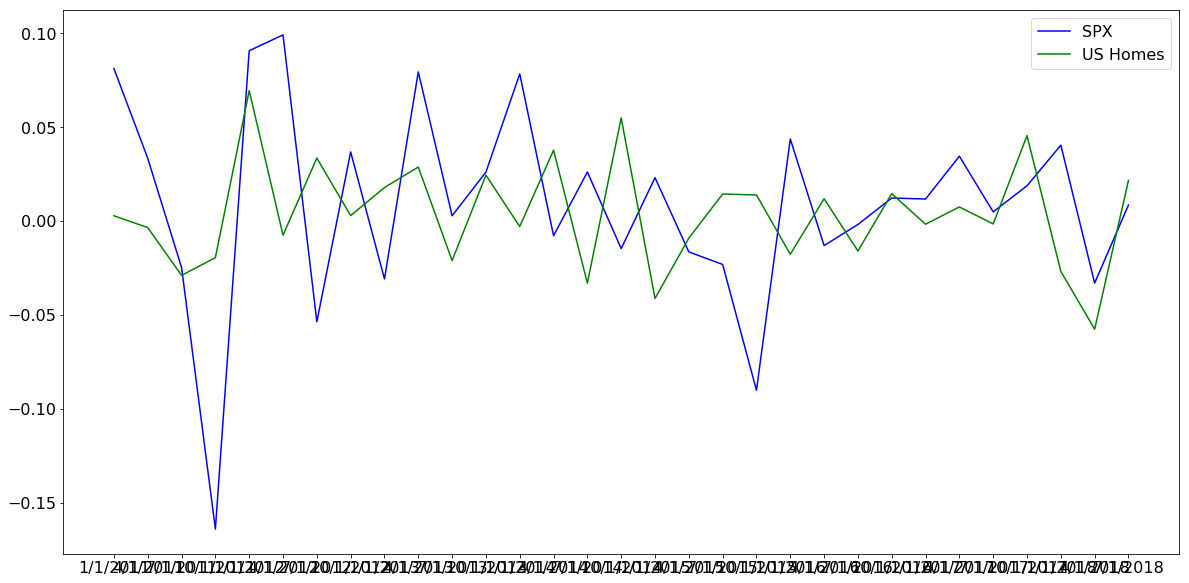

0.13035836196199466

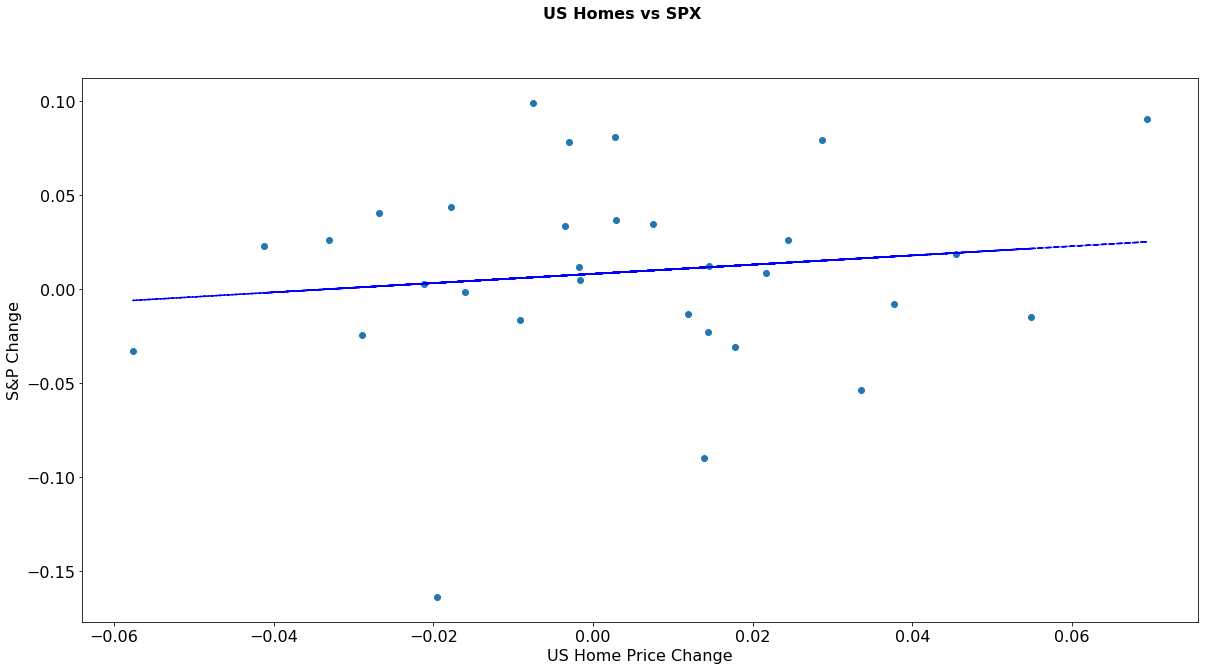

In [76]:
spx = window["SPX Change"]
re_prices = window["RE Change"]

#05-Matplotlib/Classwork/2/Activities/07-Ins_PandasMultiLine/Solved/unemploy_chart.ipynb
#Collect the years where data was collected
dates = window["DATE"]

#Plot the world average as a line chart
spx, = plt.plot(dates, spx, color="blue", label="SPX" )

#Plot the unemployment values for a single country
realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

#Create a legend for our chart
plt.legend(handles=[spx, realestate], loc="best")

#Show the chart
plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["SPX Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs SPX", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("S&P Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["SPX Change"].corr(window["RE Change"])

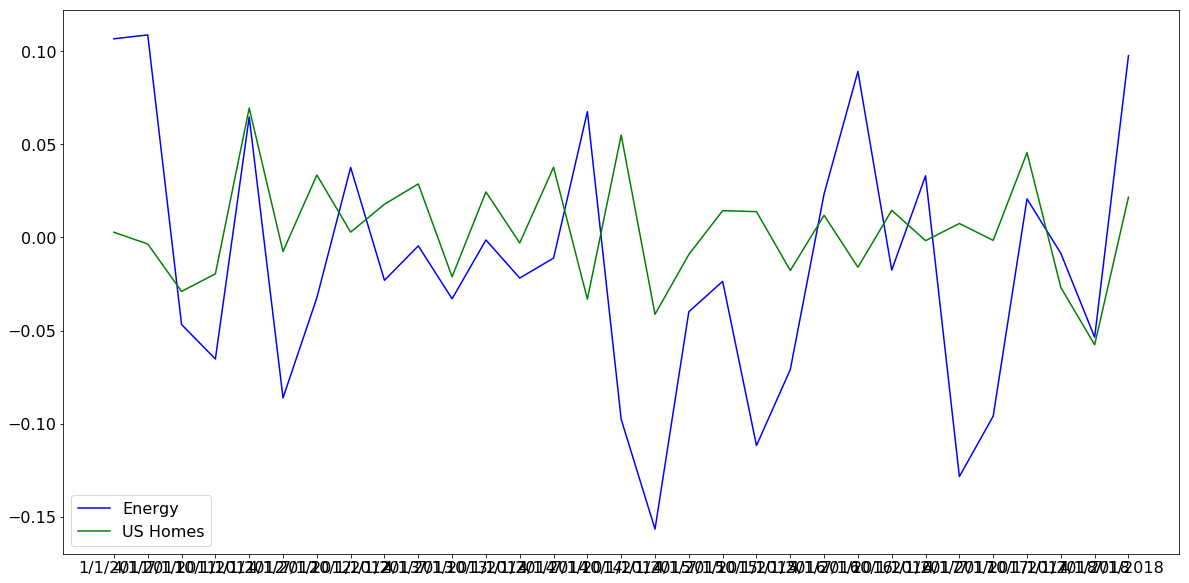

0.1838062546563848

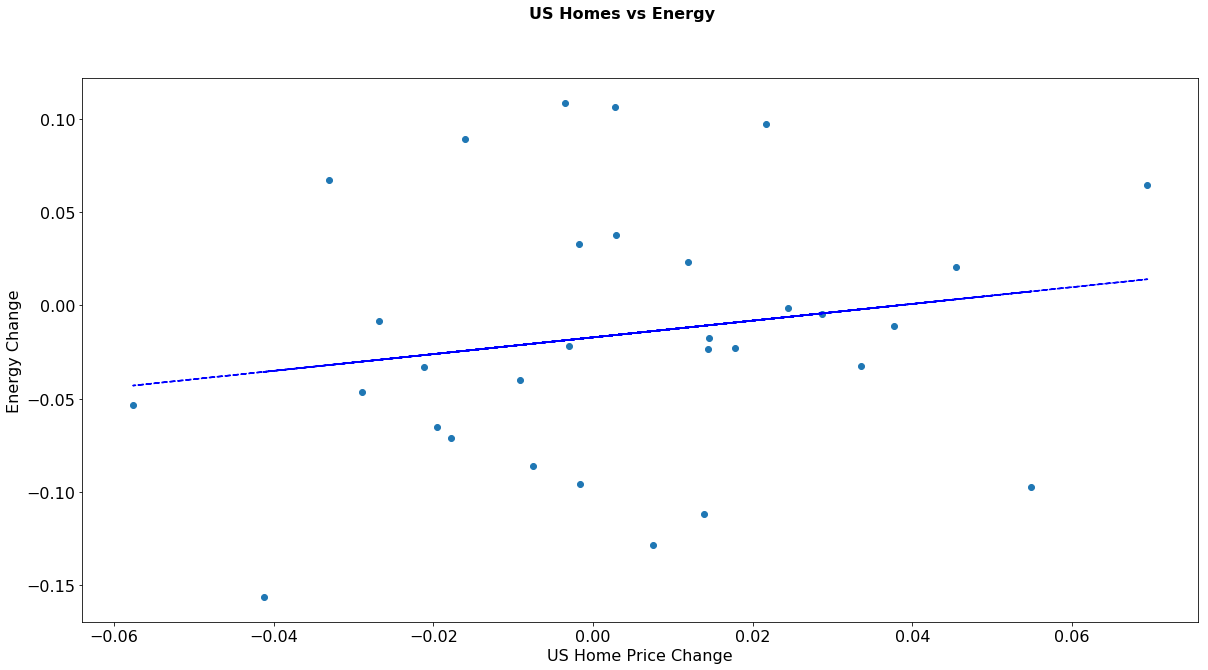

In [77]:
energy = window["Energy Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

energy, = plt.plot(dates, energy, color="blue", label="Energy" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[energy, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Energy Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Energy", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Energy Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Energy Change"].corr(window["RE Change"])

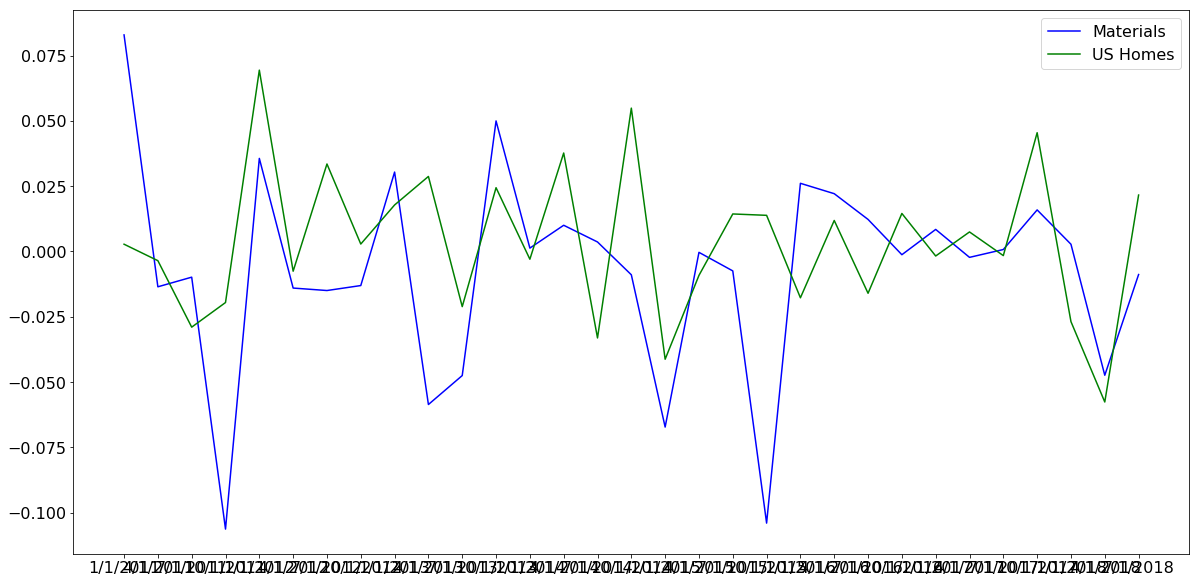

0.3038136390877769

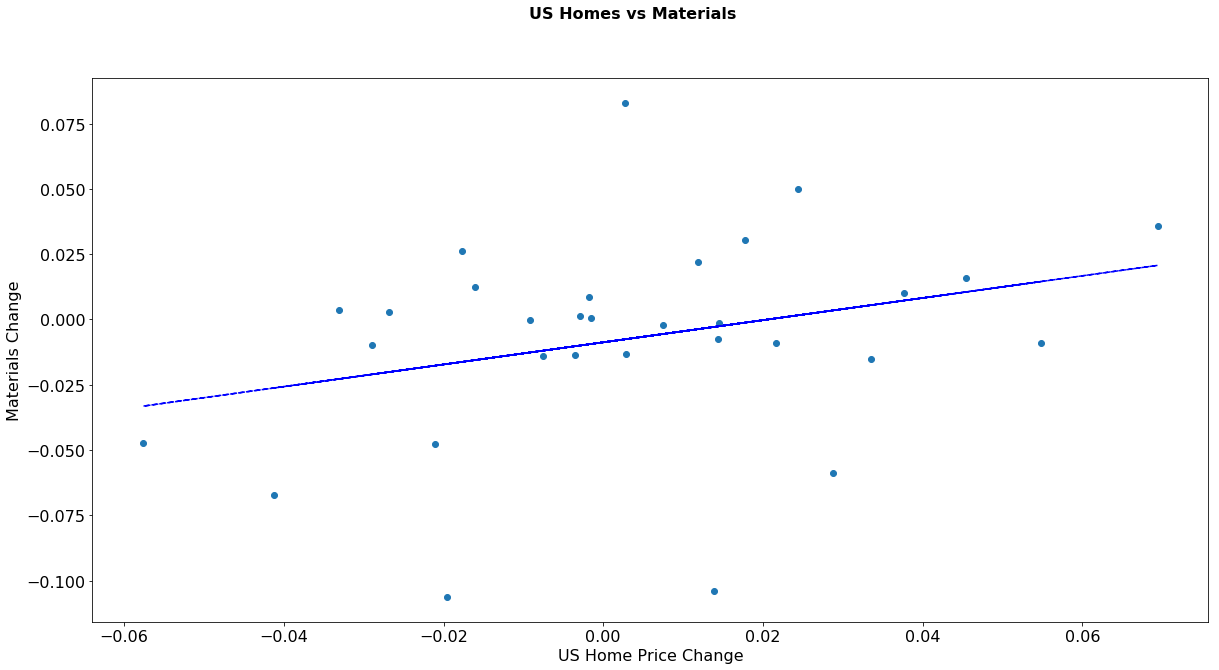

In [78]:
materials = window["Materials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

materials, = plt.plot(dates, materials, color="blue", label="Materials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[materials, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Materials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Materials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Materials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Materials Change"].corr(window["RE Change"])

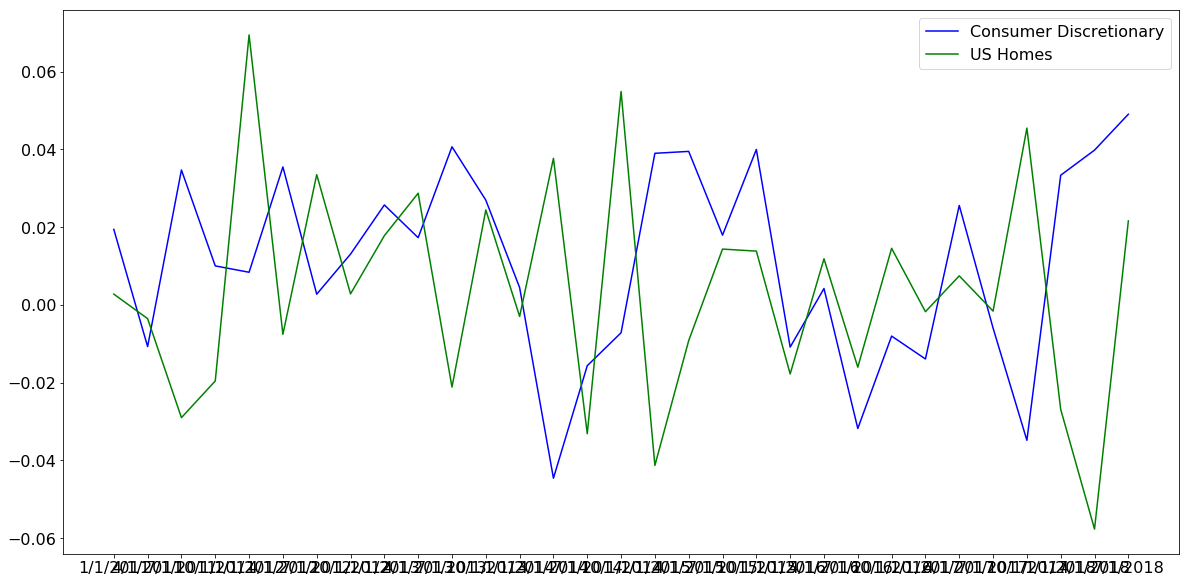

-0.31761162406396487

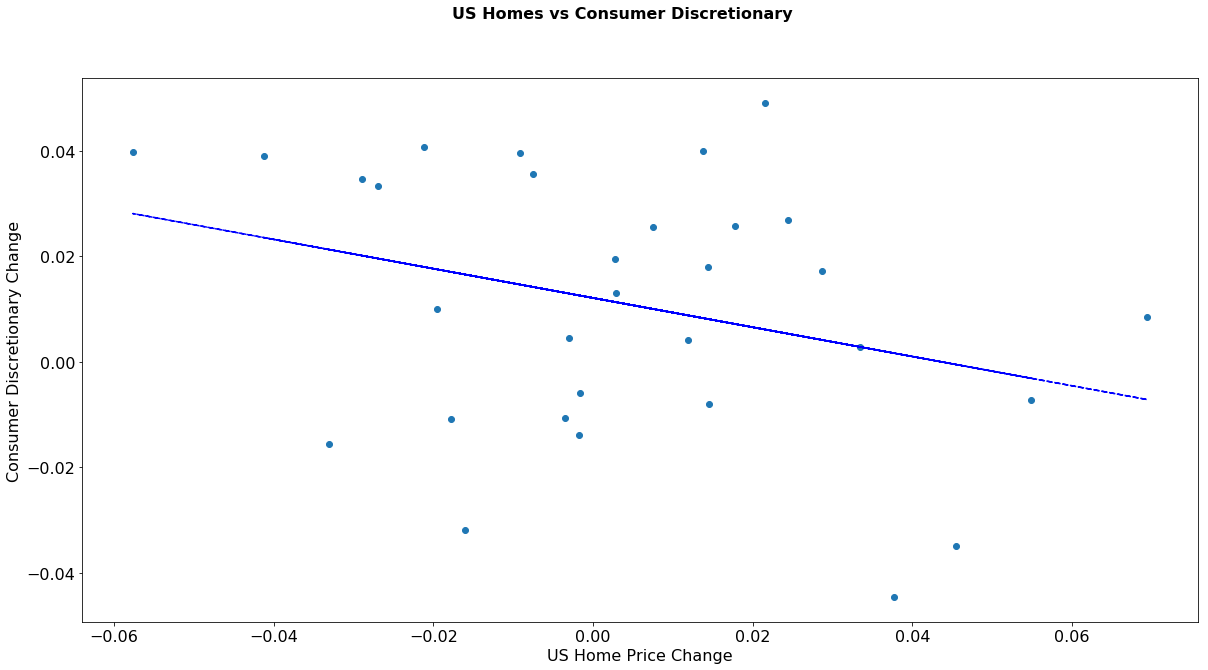

In [79]:
consdisc = window["Consumer Discretionary Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

consdisc, = plt.plot(dates, consdisc, color="blue", label="Consumer Discretionary" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[consdisc, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Consumer Discretionary Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Consumer Discretionary", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Consumer Discretionary Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Consumer Discretionary Change"].corr(window["RE Change"])

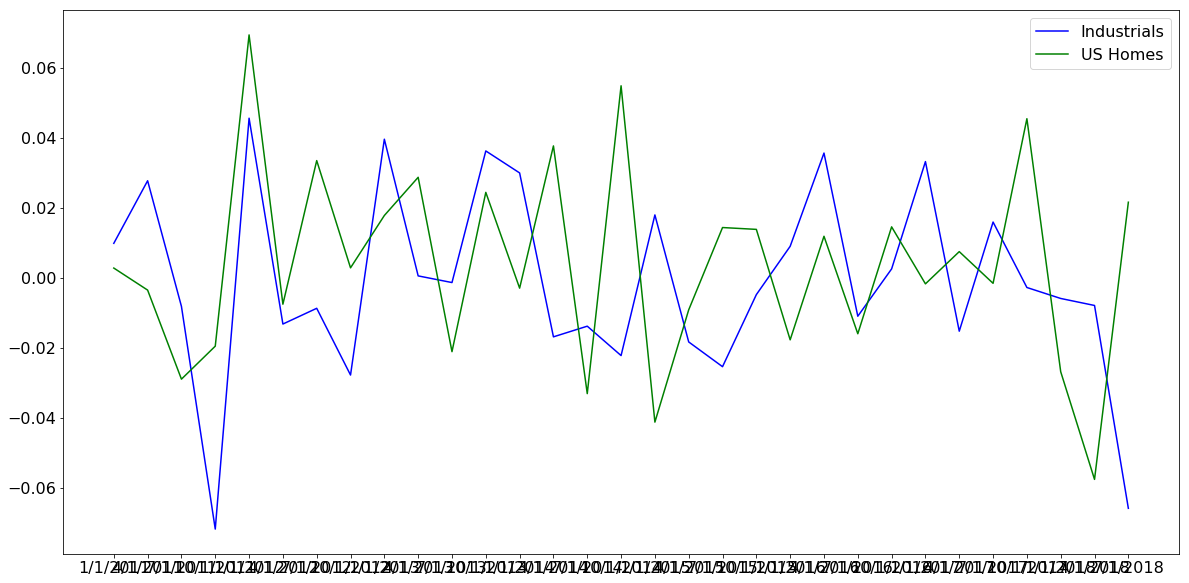

0.1313507260924843

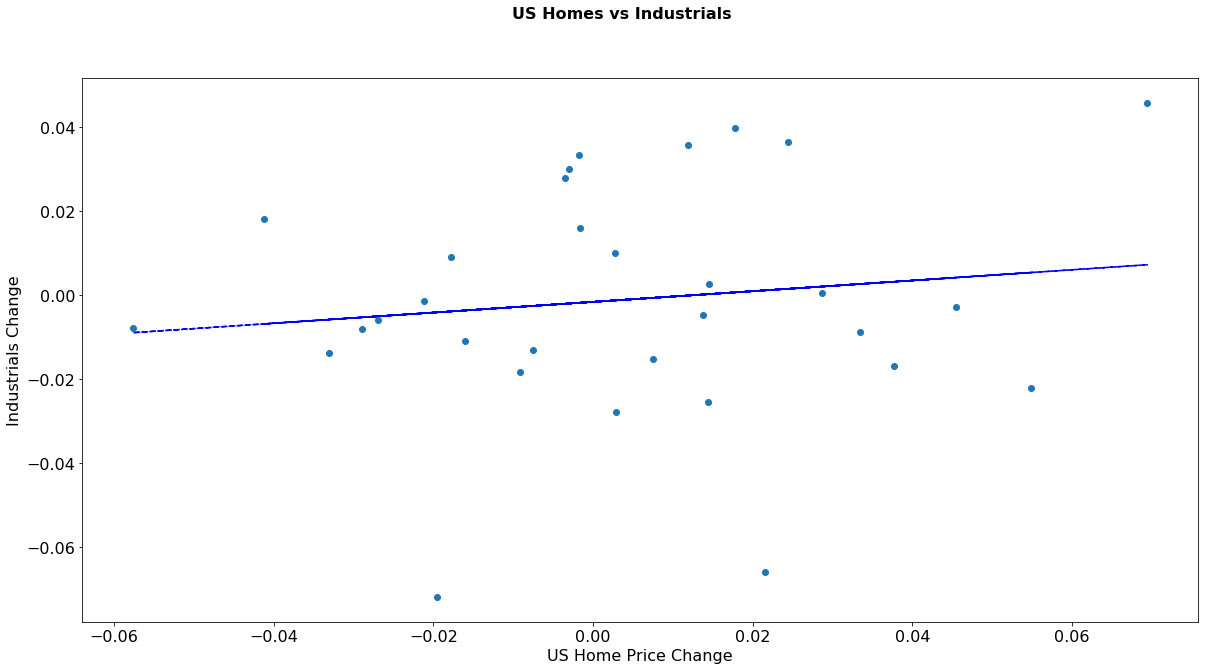

In [80]:
indu = window["Industrials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

indu, = plt.plot(dates, indu, color="blue", label="Industrials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[indu, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Industrials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Industrials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Industrials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Industrials Change"].corr(window["RE Change"])

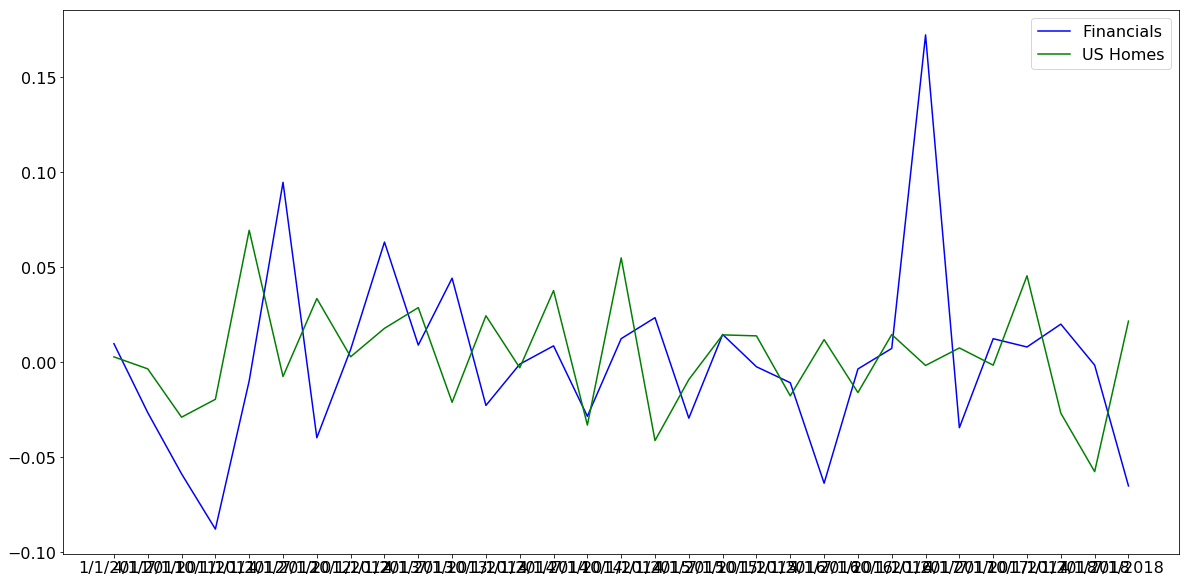

-0.009267067323207609

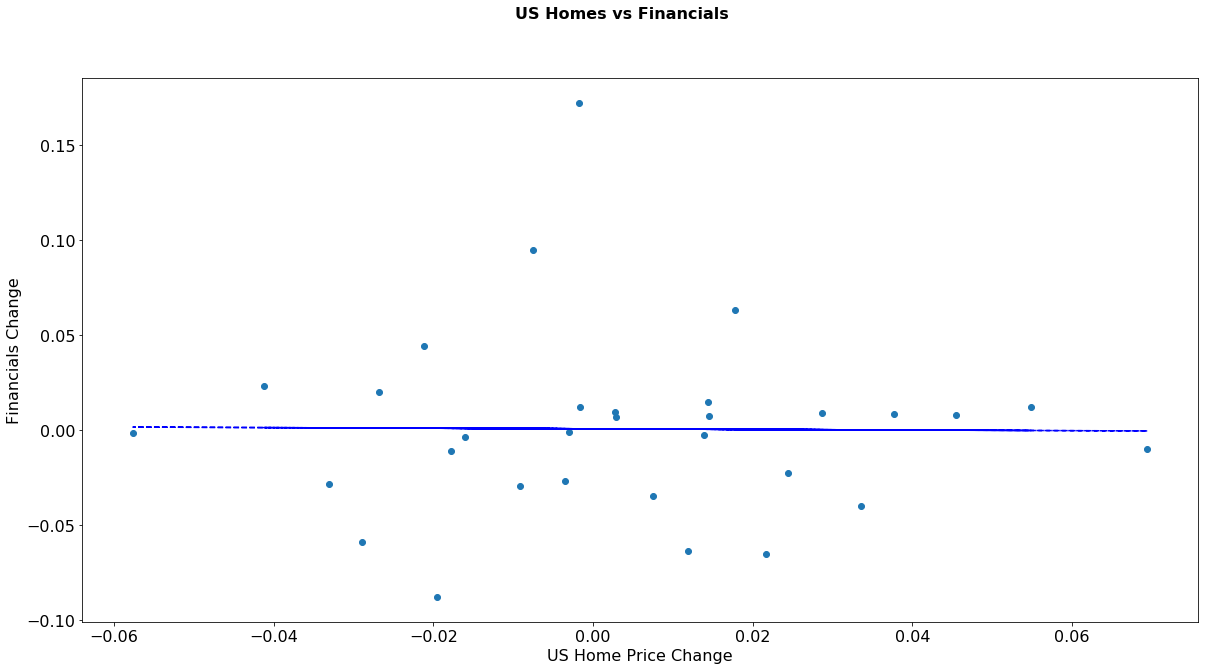

In [81]:
fin = window["Financials Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

fin, = plt.plot(dates, fin, color="blue", label="Financials" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[fin, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Financials Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Financials", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Financials Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Financials Change"].corr(window["RE Change"])

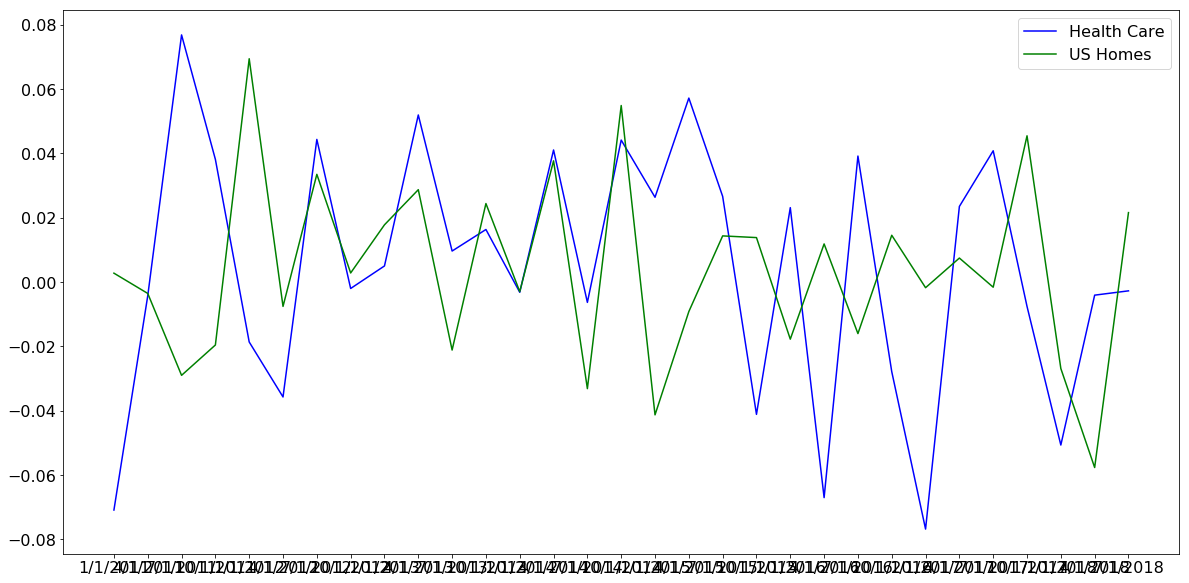

0.0042058776319941595

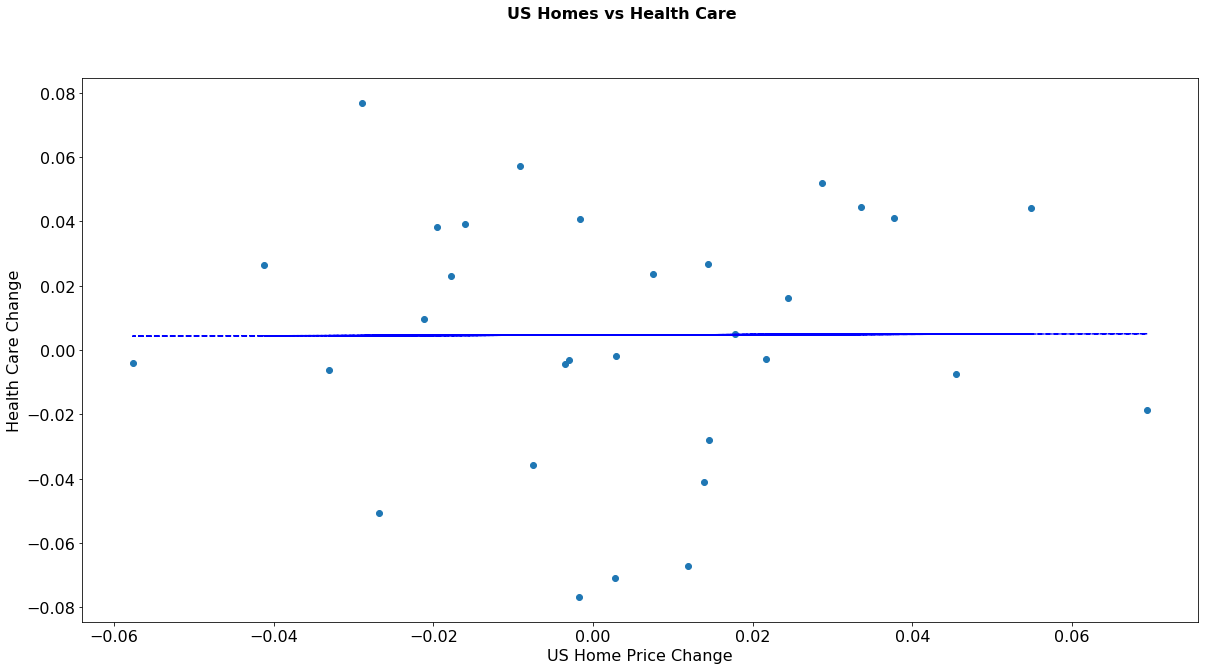

In [82]:
hcare = window["Health Care Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

hcare, = plt.plot(dates, hcare, color="blue", label="Health Care" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[hcare, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Health Care Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Health Care", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Health Care Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Health Care Change"].corr(window["RE Change"])

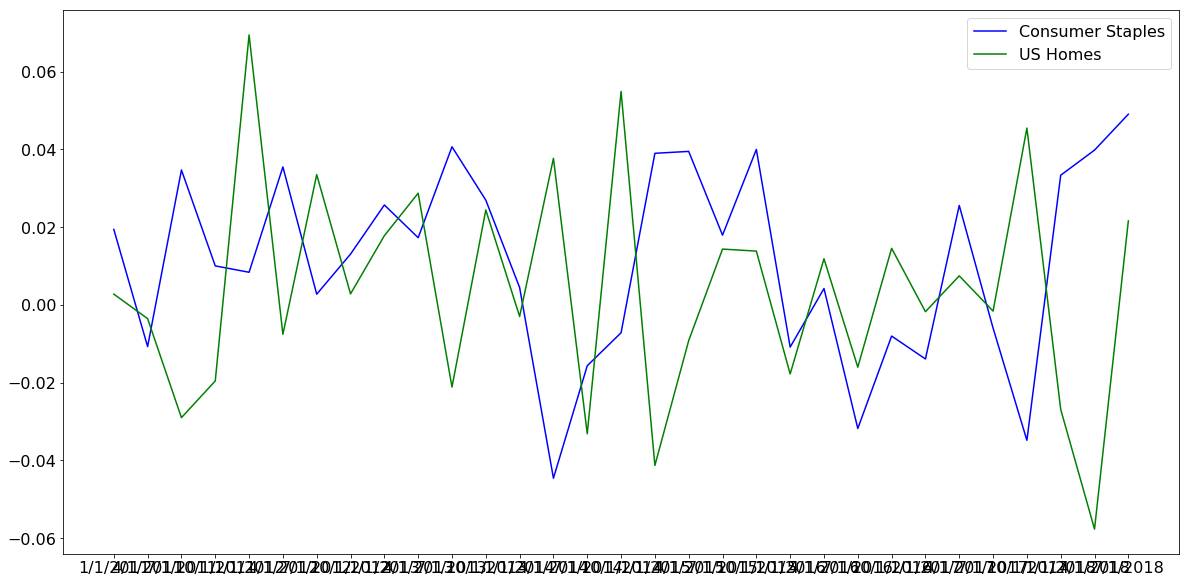

-0.31761162406396487

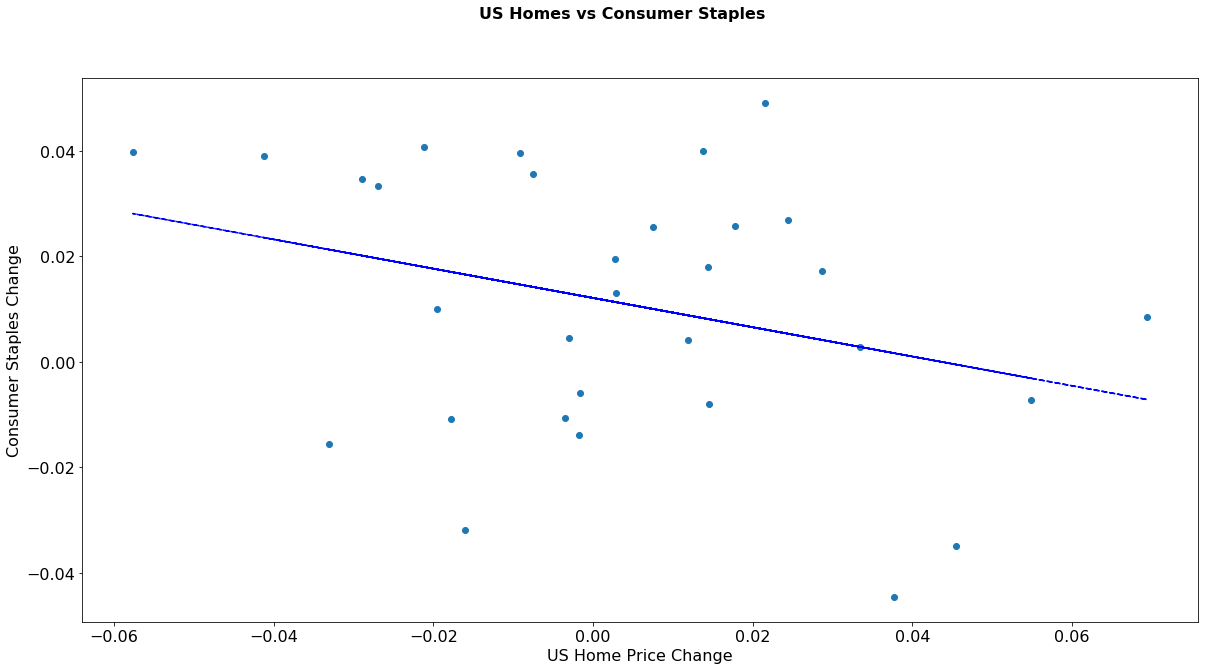

In [83]:
constaples = window["Consumer Staples Change"]
re_prices = window["RE Change"]

dates = window["DATE"]

constaples, = plt.plot(dates, constaples, color="blue", label="Consumer Staples" )

realestate, = plt.plot(dates, re_prices, color="green",label="US Homes")

plt.legend(handles=[constaples, realestate], loc="best")

plt.show()

#Scatter plot with regression-->
# Set data
y_axis = window["Consumer Staples Change"]
x_axis = window["RE Change"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("US Homes vs Consumer Staples", fontsize=16, fontweight="bold")

ax.set_xlabel("US Home Price Change")
ax.set_ylabel("Consumer Staples Change")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

#Find Correlation-->
window["Consumer Staples Change"].corr(window["RE Change"])